In [70]:
#define a function to count the number of words in a given file
def count_words_in_file(filename):
    with open(filename, 'r') as file:
        text = file.read()
        word_count = len(text.split())
        return word_count

In [945]:
from bookclass import *
import pandas as pd

book_folders = listdir("/Users/ericfrey/Documents/nlp/Project-Gutenberg/Books")
txtfiles_directory = pd.concat([pd.read_csv('/Users/ericfrey/Documents/nlp/Project-Gutenberg/Data/gutenbergDownloads_full1.csv'),
                                pd.read_csv('/Users/ericfrey/Documents/nlp/Project-Gutenberg/Data/gutenbergDownloads_full2.csv')],
                                axis=0).drop_duplicates()
goodreads_catalog = pd.read_csv('../Data/books_around_WWI.csv')


In [948]:
#merge the goodreads catalog adnd 
booksData = txtfiles_directory.drop(["Unnamed: 0"], axis=1).merge(goodreads_catalog.drop(["Unnamed: 0","id"], axis=1), left_on="goodreads_title", right_on='title', how='left' ).drop_duplicates(subset=['title_x','author']).drop('title_y', axis=1)
booksData['word_count'] = booksData.apply(lambda x: count_words_in_file('../Books/' + str(x.gutenberg_id) + '.txt'), axis=1)
booksData = booksData[(booksData.word_count < 100000) & (booksData.word_count > 10000)].reset_index(drop=True)

In [951]:
booksData.publish_date.describe()

count     139.000000
mean     1906.892086
std        12.307468
min      1890.000000
25%      1895.000000
50%      1906.000000
75%      1918.000000
max      1938.000000
Name: publish_date, dtype: float64

<AxesSubplot: >

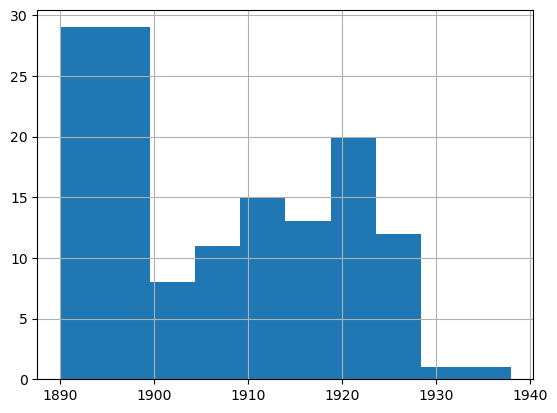

In [894]:
booksData.publish_date.hist()

In [895]:
def f(b):
    try:
        re.findall(r'\/*([^\/]*).txt',b)[0]
    except:
        print(b)
books=[Book_raw_data(b) for b in  booksData.gutenberg_id.astype(str)  + '.txt']

os.chdir('/Users/ericfrey/Documents/nlp/Project-Gutenberg/Books')

from tqdm import tqdm
for b in tqdm(books):
    b.load_all_combined()
# os.chdir(os.path.dirname(os.path.realpath(__file__)))

100%|██████████| 139/139 [00:32<00:00,  4.25it/s]


0
100
(139, 100)
[5.81241885 5.82288436 5.83766193 5.84441449 5.84678191 5.85769943
 5.85723104 5.86148116 5.86808715 5.87470175 5.86841187 5.86545732
 5.86019231 5.85745534 5.85598947 5.85034241 5.84473477 5.83955145
 5.83466403 5.83763332 5.83330377 5.83100926 5.83318917 5.82989088
 5.83776178 5.83413748 5.82532462 5.8180192  5.81823351 5.80963156
 5.80771168 5.80351965 5.80369224 5.79518099 5.79030118 5.78284716
 5.78186057 5.7892271  5.78501082 5.78549247 5.78061321 5.78949297
 5.79662277 5.80325581 5.80231287 5.81326087 5.81861826 5.82555371
 5.82515982 5.83079498 5.83354281 5.82855285 5.82682672 5.8266888
 5.83093932 5.83766239 5.83381976 5.83157396 5.83105025 5.82991827
 5.83464213 5.83576202 5.83865739 5.83616934 5.83581242 5.84280297
 5.84439044 5.84357734 5.8344005  5.84317236 5.84840682 5.85162072
 5.85434057 5.86366763 5.87071753 5.87654508 5.88164759 5.89300326
 5.89503448 5.90339782 5.90450642 5.89953395 5.90313804 5.90146693
 5.89994387 5.89899075 5.89918376 5.90506827 5

Text(0.5, 1.0, 'Example time series: 1250')

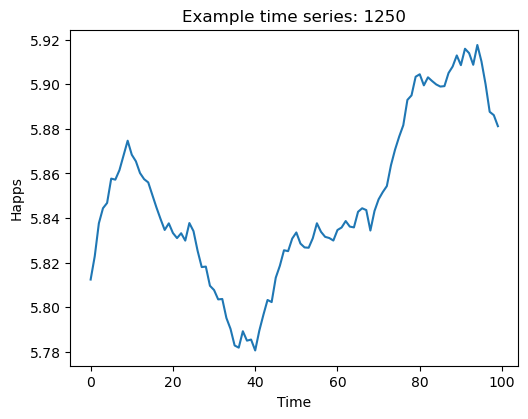

In [900]:
#%%
import numpy as np
num_points = 100
big_matrix = np.ones([len(books),num_points])
# big_matrix_mean0 = np.ones(big_matrix.shape)
stop_val = 1.0
for i,b in enumerate(books):
    if i%100 == 0:
        print(i)
    # print(b.title)
    b_data = b
    a = b_data.chopper_sliding(my_LabMT,num_points=num_points,stop_val=stop_val)
    big_matrix[i,:] = b_data.timeseries
print(big_matrix.shape)

#%%
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=2, weights="uniform")
big_matrix=imputer.fit_transform(big_matrix)

#%%
big_matrix_mean0 = big_matrix-np.tile(big_matrix.mean(axis=1),(num_points,1)).transpose()
import matplotlib.pyplot as plt
print(big_matrix[0,:])
fig = plt.figure()
ax = fig.add_axes([.2,.2,.7,.7])
ax.plot(big_matrix[0,:])
ax.set_xlabel("Time")
ax.set_ylabel("Happs")
ax.set_title("Example time series: {}".format(books[0].title))

In [904]:
booksData.head(16)

gutenberg_id                                            title_x  \
0           1250                                             Anthem   
1            166                                             Summer   
2          15408  Three Lives: Stories of The Good Anna, Melanct...   
3          16389                                The Enchanted April   
4           1210     Kwaidan: Stories and Studies of Strange Things   
5            520             The Life and Adventures of Santa Claus   
6           5670                                       Jacob's Room   
7           2814                                          Dubliners   
8          17396                                  The Secret Garden   
9           4217            A Portrait of the Artist as a Young Man   
10          4517                                        Ethan Frome   
11           416  Winesburg, Ohio: A Group of Tales of Ohio Smal...   
12         66073                                    Death in Venice   
13          2775                                   The Good Soldier   
14         37189                          The Return of the Soldier   
15           175                           The Phantom of the Opera   

                                   goodreads_title                   author  \
0                                           Anthem                 Ayn Rand   
1                                           Summer            Edith Wharton   
2                                      Three Lives           Gertrude Stein   
3                              The Enchanted April      Elizabeth von Arnim   
4   Kwaidan: Stories and Studies of Strange Things           Lafcadio Hearn   
5           The Life and Adventures of Santa Claus            L. Frank Baum   
6                                     Jacob's Room           Virginia Woolf   
7                                        Dubliners              James Joyce   
8                                The Secret Garden  Frances Hodgson Burnett   
9          A Portrait of the Artist as a Young Man              James Joyce   
10                                     Ethan Frome            Edith Wharton   
11                                 Winesburg, Ohio        Sherwood Anderson   
12                                 Death in Venice              Thomas Mann   
13                                The Good Soldier          Ford Madox Ford   
14                       The Return of the Soldier             Rebecca West   
15                        The Phantom of the Opera            Gaston Leroux   

    publish_date  word_count  
0         1938.0       21961  
1         1917.0       55145  
2         1909.0       81847  
3         1922.0       73852  
4         1904.0       36216  
5         1902.0       30126  
6         1922.0       52271  
7         1914.0       64277  
8         1911.0       76656  
9         1916.0       80089  
10        1911.0       34467  
11        1919.0       70860  
12        1912.0       28677  
13        1915.0       71767  
14        1918.0       29964  
15        1909.0       80449

In [905]:
index1

15

In [944]:
index1 = booksData.reset_index()[booksData.reset_index().title_x.str.contains('Phantom of the Opera')].index[0]
print(booksData.reset_index().loc[index1].title_x)
fig = xp.line(pd.Series(big_matrix[index1,:]), labels={
    'index':"Percent of the Book",
    'value':'Sentiment'
},
width=600, height=400
        )
fig.update_layout(showlegend=False)
fig.show()

The Phantom of the Opera


In [930]:
def get_max(timeseries, width):
    max_ts = sum((big_matrix[index1,:] == max(big_matrix[index1,:])) * range(0,100))
    
    return [max_ts - width, max_ts + width]

def get_min(timeseries, width):
    min_ts = sum((big_matrix[index1,:] == min(big_matrix[index1,:])) * range(0,100))
    return [min_ts - width, min_ts + width]

peak_range = get_max(big_matrix[index1,:], .7) 
valley_range = get_min(big_matrix[index1,:], .7) 

In [910]:
with open('../Books/' + books[index1].txt_file_path) as f:
    phantom = f.readlines()

In [911]:
phantom_df = pd.DataFrame(pd.Series(phantom[0].split(' '), name='text'))
phantom_df['position'] = phantom_df.index*100/len(phantom_df)

In [931]:
peak_text = ' '.join(list(phantom_df.text[(phantom_df.position > min(peak_range)) & (phantom_df.position < max(peak_range))])).replace("\\n", "\n").replace("\\r", "\r")
print(peak_text)

glance at Box Five to see whether
M. Debienne and M. Poligny were enjoying the performance.

Next morning, the managers received a card of thanks from the ghost:

DEAR, MR.  MANAGER:

Thanks.  Charming evening.  Daae exquisite.  Choruses want waking up.
Carlotta a splendid commonplace instrument.  Will write you soon for
the 240,000 francs, or 233,424 fr. 70 c., to be correct.  Mm. Debienne
and Poligny have sent me the 6,575 fr. 30 c. representing the first ten
days of my allowance for the current year; their privileges finished on
the evening of the tenth inst.

Kind regards.  O. G.

On the other hand, there was a letter from Mm. Debienne and Poligny:

GENTLEMEN:

We are much obliged for your kind thought of us, but you will easily
understand that the prospect of again hearing Faust, pleasant though it
is to ex-managers of the Opera, can not make us forget that we have no
right to occupy Box Five on the grand tier, which is the exclusive
property of HIM of whom we spoke to you when we

In [932]:
valley_text = ' '.join(list(phantom_df.text[(phantom_df.position > min(valley_range)) & (phantom_df.position < max(valley_range))])).replace("\\n", "\n").replace("\\r", "\r")
print(valley_text)

born in a small town not
far from Rouen.  He was the son of a master-mason. He ran away at an
early age from his father\'s house, where his ugliness was a subject of
horror and terror to his parents.  For a time, he frequented the fairs,
where a showman exhibited him as the "living corpse." He seems to have
crossed the whole of Europe, from fair to fair, and to have completed
his strange education as an artist and magician at the very
fountain-head of art and magic, among the Gipsies.  A period of Erik\'s
life remained quite obscure.  He was seen at the fair of
Nijni-Novgorod, where he displayed himself in all his hideous glory.
He already sang as nobody on this earth had ever sung before; he
practised ventriloquism and gave displays of legerdemain so
extraordinary that the caravans returning to Asia talked about it
during the whole length of their journey.  In this way, his reputation
penetrated the walls of the palace at Mazenderan, where the little
sultana, the favorite of the Shah-

In [925]:
' '.join(list(phantom_df.text[(phantom_df.position > min(valley_range)) & (phantom_df.position < max(valley_range))]))

'boring herself to death.\\r\\nA dealer in furs, returning to Samarkand from Nijni-Novgorod, told of\\r\\nthe marvels which he had seen performed in Erik\\\'s tent.  The trader was\\r\\nsummoned to the palace and the daroga of Mazenderan was told to\\r\\nquestion him.  Next the daroga was instructed to go and find Erik.  He\\r\\nbrought him to Persia, where for some months Erik\\\'s will was law.  He\\r\\nwas guilty of not a few horrors, for he seemed not to know the\\r\\ndifference between good and evil.  He took part calmly in a number of\\r\\npolitical assassinations; and he turned his diabolical inventive powers\\r\\nagainst the Emir of Afghanistan, who was at war with the Persian\\r\\nempire.  The Shah took a liking to him.\\r\\n\\r\\nThis was the time of the rosy hours of Mazenderan, of which the\\r\\ndaroga\\\'s narrative has given us a glimpse.  Erik had very original\\r\\nideas on the subject of architecture and thought out a palace much as a\\r\\nconjuror contrives a trick-ca

In [ ]:
books[index1].txt_file_path

Text(0.5, 0, 'components')

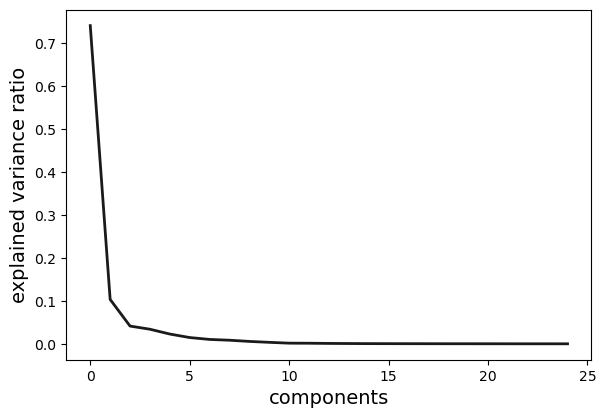

In [74]:
# mysavefig("example-timeseries.pdf",folder="media/figures/SVD",openfig=False)
#%%
from sklearn import metrics
from sklearn.cluster import KMeans
# from the demo
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import NMF
from sklearn.preprocessing import scale
#%%
np.where(np.isnan(big_matrix)==True)
#%%
big_matrix[1,1]
books[17].timeseries
#%%
pca = PCA(n_components=25)
pca.fit(big_matrix)
#%%
fig = plt.figure(figsize=(7.5,5))
ax1 = fig.add_axes([0.2,0.2,0.7,0.7])
ax1.plot(pca.explained_variance_ratio_,color=".1",linewidth=2)
ax1.set_ylabel('explained variance ratio',fontsize=14)
ax1.set_xlabel('components',fontsize=14)
# mysavefig("PCA-ncomponents-variance.pdf",folder="media/figures/SVD",openfig=False)


Text(0.5, 1.0, 'PCA Components for 256 books, unweighted\n')

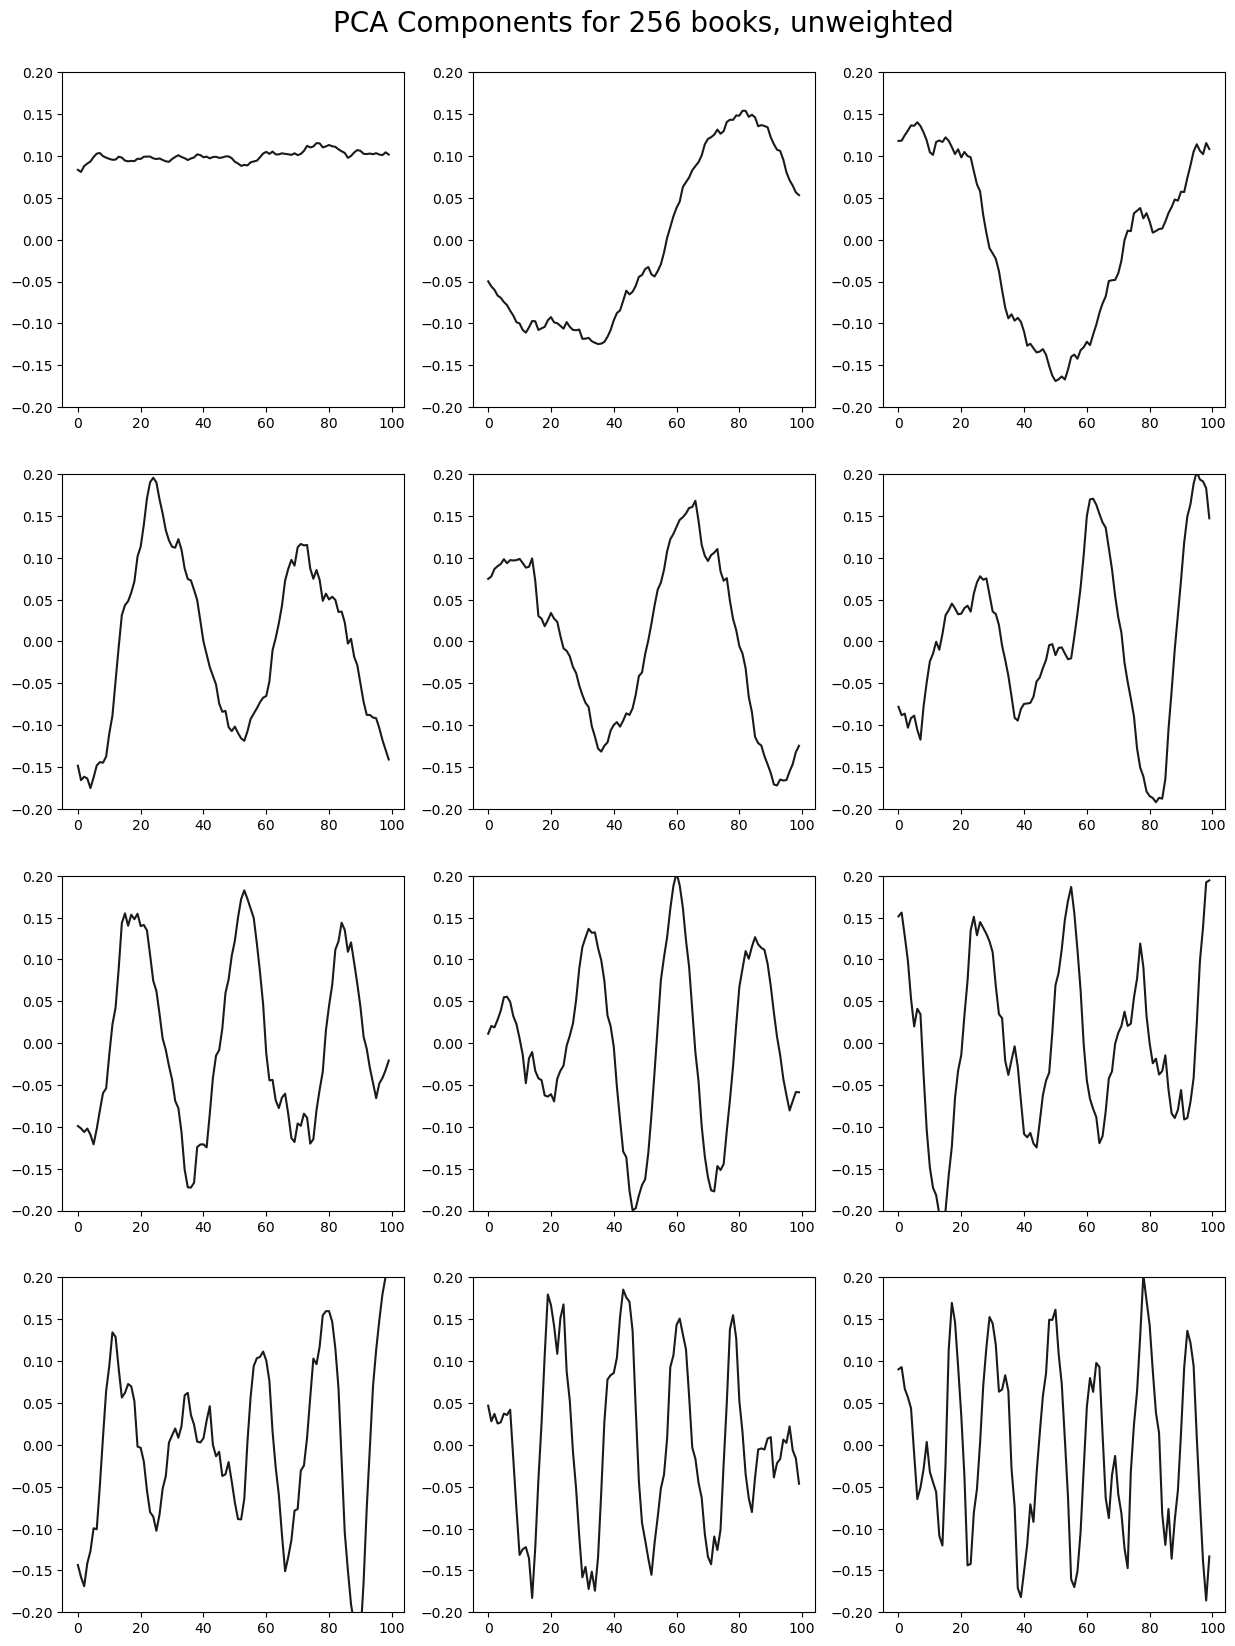

In [169]:
#%%
fig = plt.figure(figsize=(15,20))
for i in range(12):
    plt.subplot(4,3,i+1)
    plt.plot(pca.components_[i],color=".1",linewidth=1.5)
    plt.ylim([-.20,.20])
plt.subplot(4,3,2)
plt.title("PCA Components for {} books, unweighted\n".format(len(books)),fontsize=20)
# mysavefig('pca-MLEcomponents-first12.png')
# mysavefig("PCA-ncomponents-top12-timeseries-weighted.pdf",folder="media/figures/SVD",openfig=False)
#%%


Text(0.5, 1.0, 'PCA Components for 256 books, weighted\n')

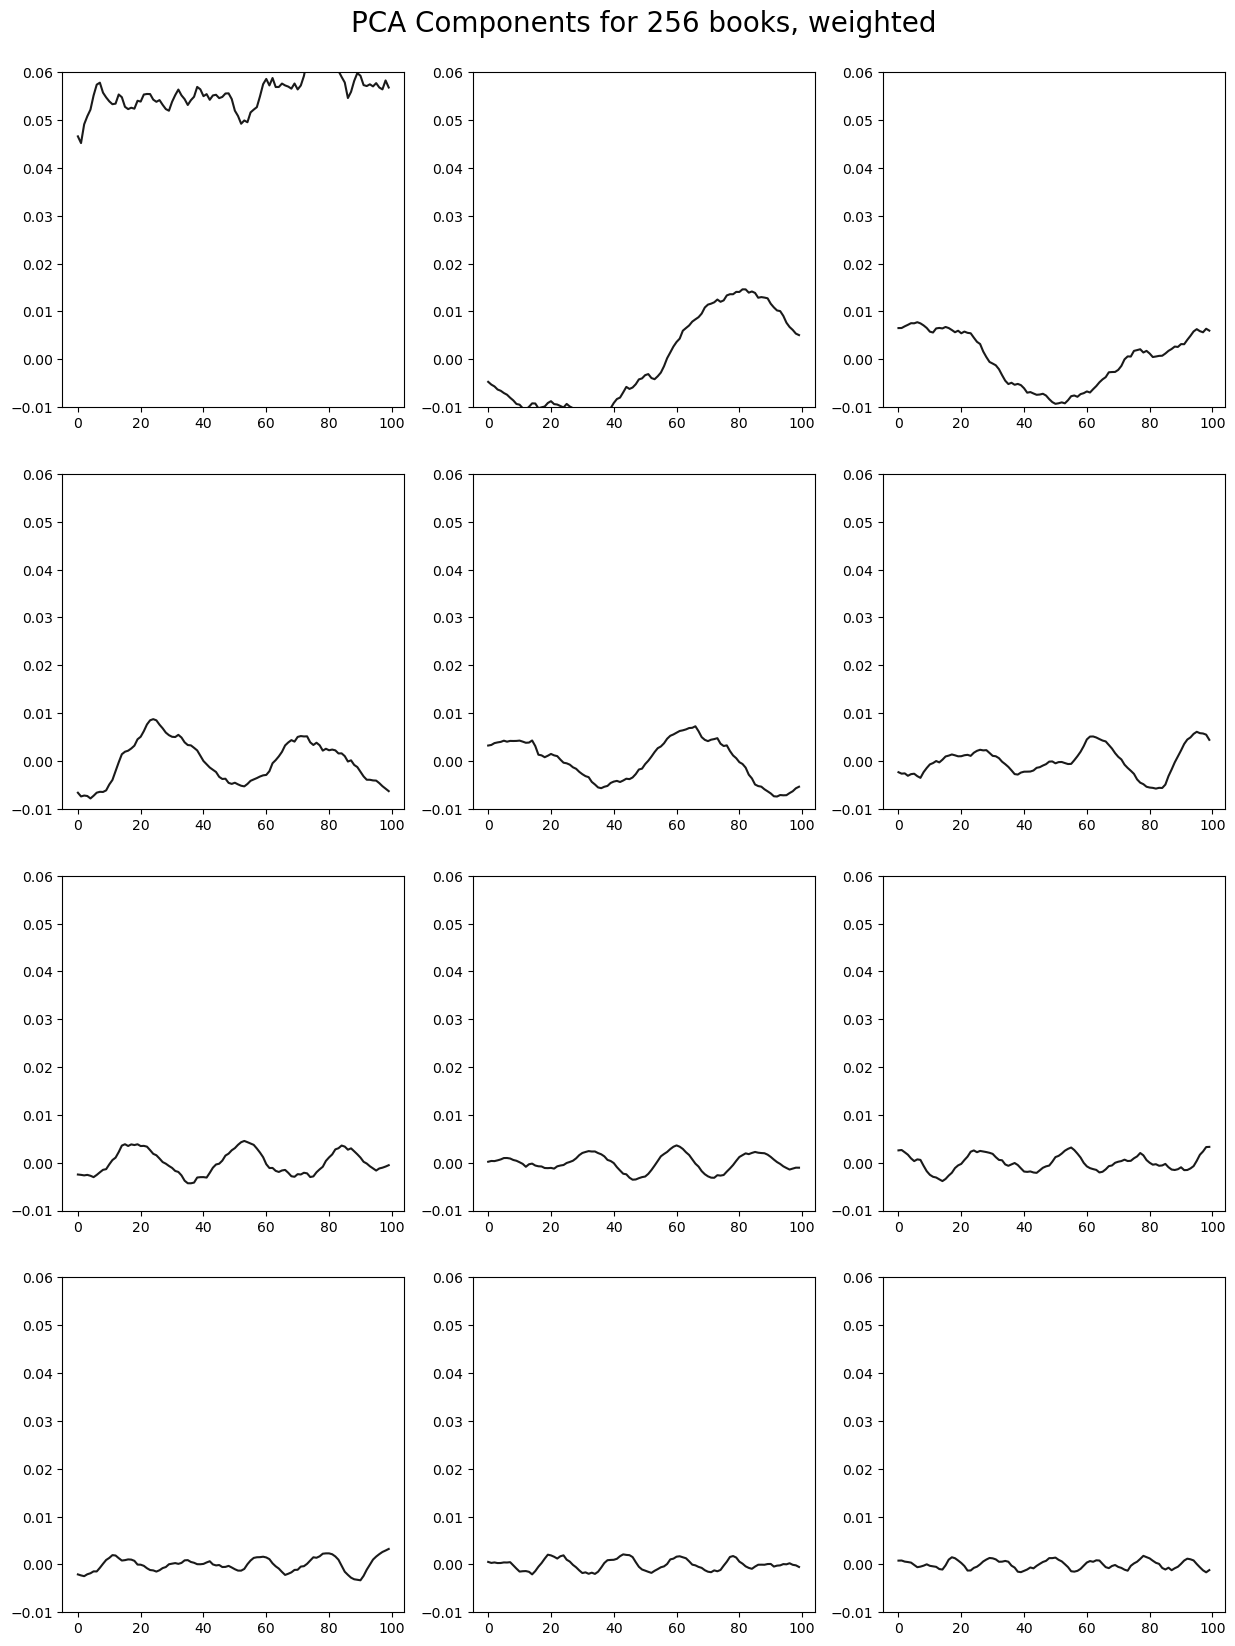

In [170]:
fig = plt.figure(figsize=(15,20))
for i in range(12):
    plt.subplot(4,3,i+1)
    plt.plot(pca.components_[i]*pca.explained_variance_ratio_[i],color=".1",linewidth=1.5)
    plt.ylim([-.01,.06])
plt.subplot(4,3,2)
plt.title("PCA Components for {} books, weighted\n".format(len(books)),fontsize=20)
# mysavefig('pca-MLEcomponents-first12.png')
# mysavefig("PCA-ncomponents-top12-timeseries-unweighted.pdf",folder="media/figures/SVD",openfig=False)
#%%


12


Text(0.5, 0, 'components')

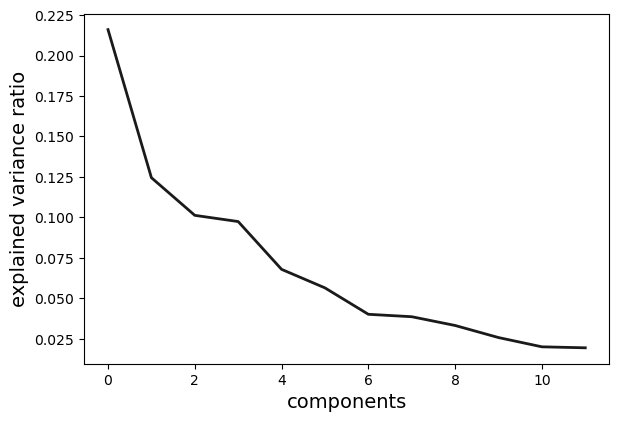

In [171]:
pca = PCA(n_components=12)
pca.fit(big_matrix_mean0)
print(pca.n_components_)
#%%
fig = plt.figure(figsize=(7.5,5))
ax1 = fig.add_axes([0.2,0.2,0.7,0.7])
ax1.plot(pca.explained_variance_ratio_,linewidth=2,color=".1")
ax1.set_ylabel('explained variance ratio',fontsize=14)
ax1.set_xlabel('components',fontsize=14)
# mysavefig('pca-{0}components-explainedvariance-mean0.png'.format(pca.n_components_))
# mysavefig("PCA-ncomponents-variance-mean0.pdf",folder="media/figures/SVD",openfig=False)


Text(0.5, 0, 'components')

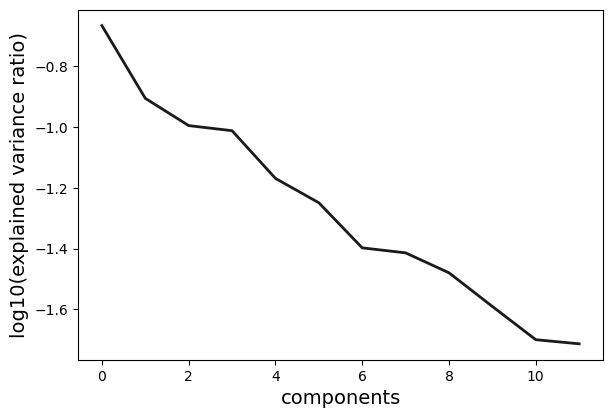

In [172]:

fig = plt.figure(figsize=(7.5,5))
ax1 = fig.add_axes([0.2,0.2,0.7,0.7])
ax1.plot(np.log10(pca.explained_variance_ratio_),color=".1",linewidth=2)
ax1.set_ylabel('log10(explained variance ratio)',fontsize=14)
ax1.set_xlabel('components',fontsize=14)
# mysavefig('pca-{0}components-explainedvariance-mean0.png'.format(pca.n_components_))
# mysavefig("PCA-ncomponents-log10variance-mean0.pdf",folder="media/figures/SVD",openfig=False)


Text(0.5, 1.0, 'PCA Components for 256 books, unweighted\n')

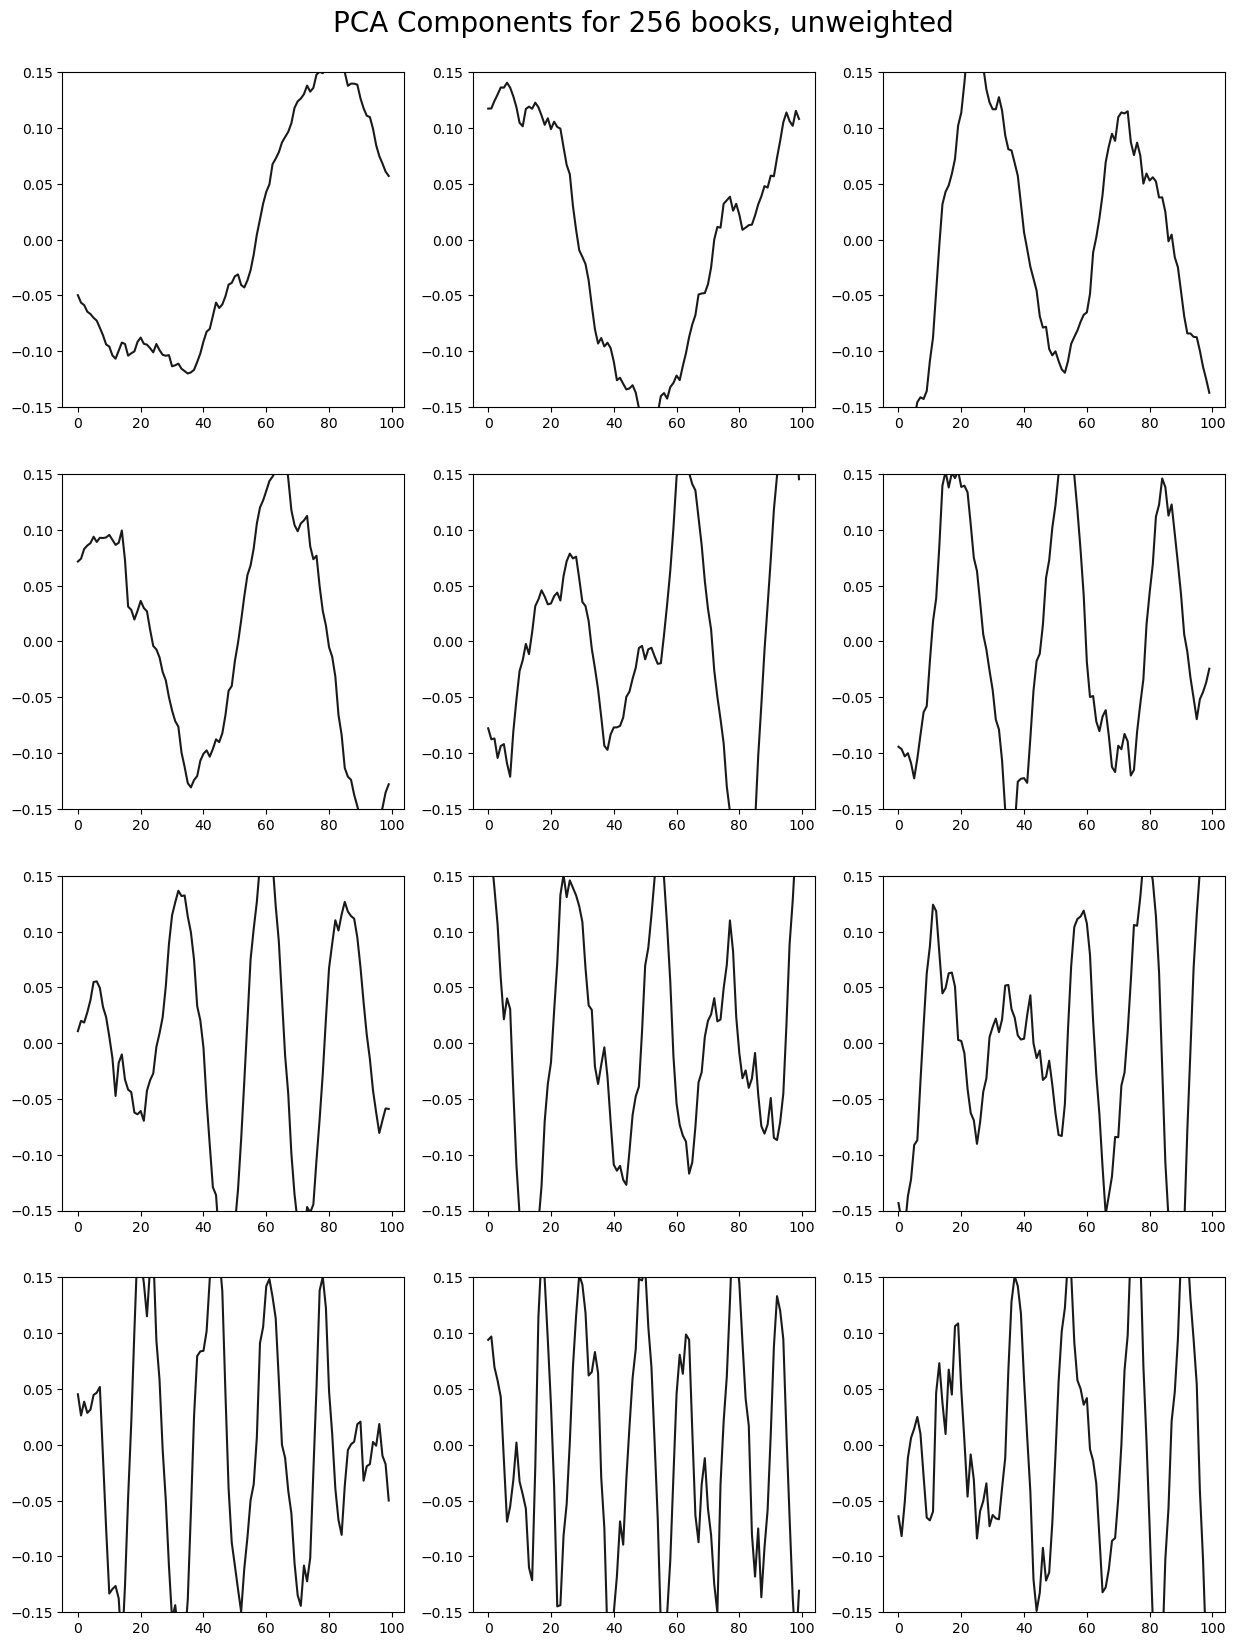

In [173]:

fig = plt.figure(figsize=(15,20))
for i in range(12):
    plt.subplot(4,3,i+1)
    plt.plot(pca.components_[i],color=".1",linewidth=1.5)
    plt.ylim([-.15,.15])
plt.subplot(4,3,2)
plt.title("PCA Components for {} books, unweighted\n".format(len(books)),fontsize=20)
# mysavefig("PCA-ncomponents-timeseries-unweighted-mean0.pdf",folder="media/figures/SVD",openfig=False)
#%%


Text(0.5, 1.0, 'PCA Components for 256 books, weighted\n')

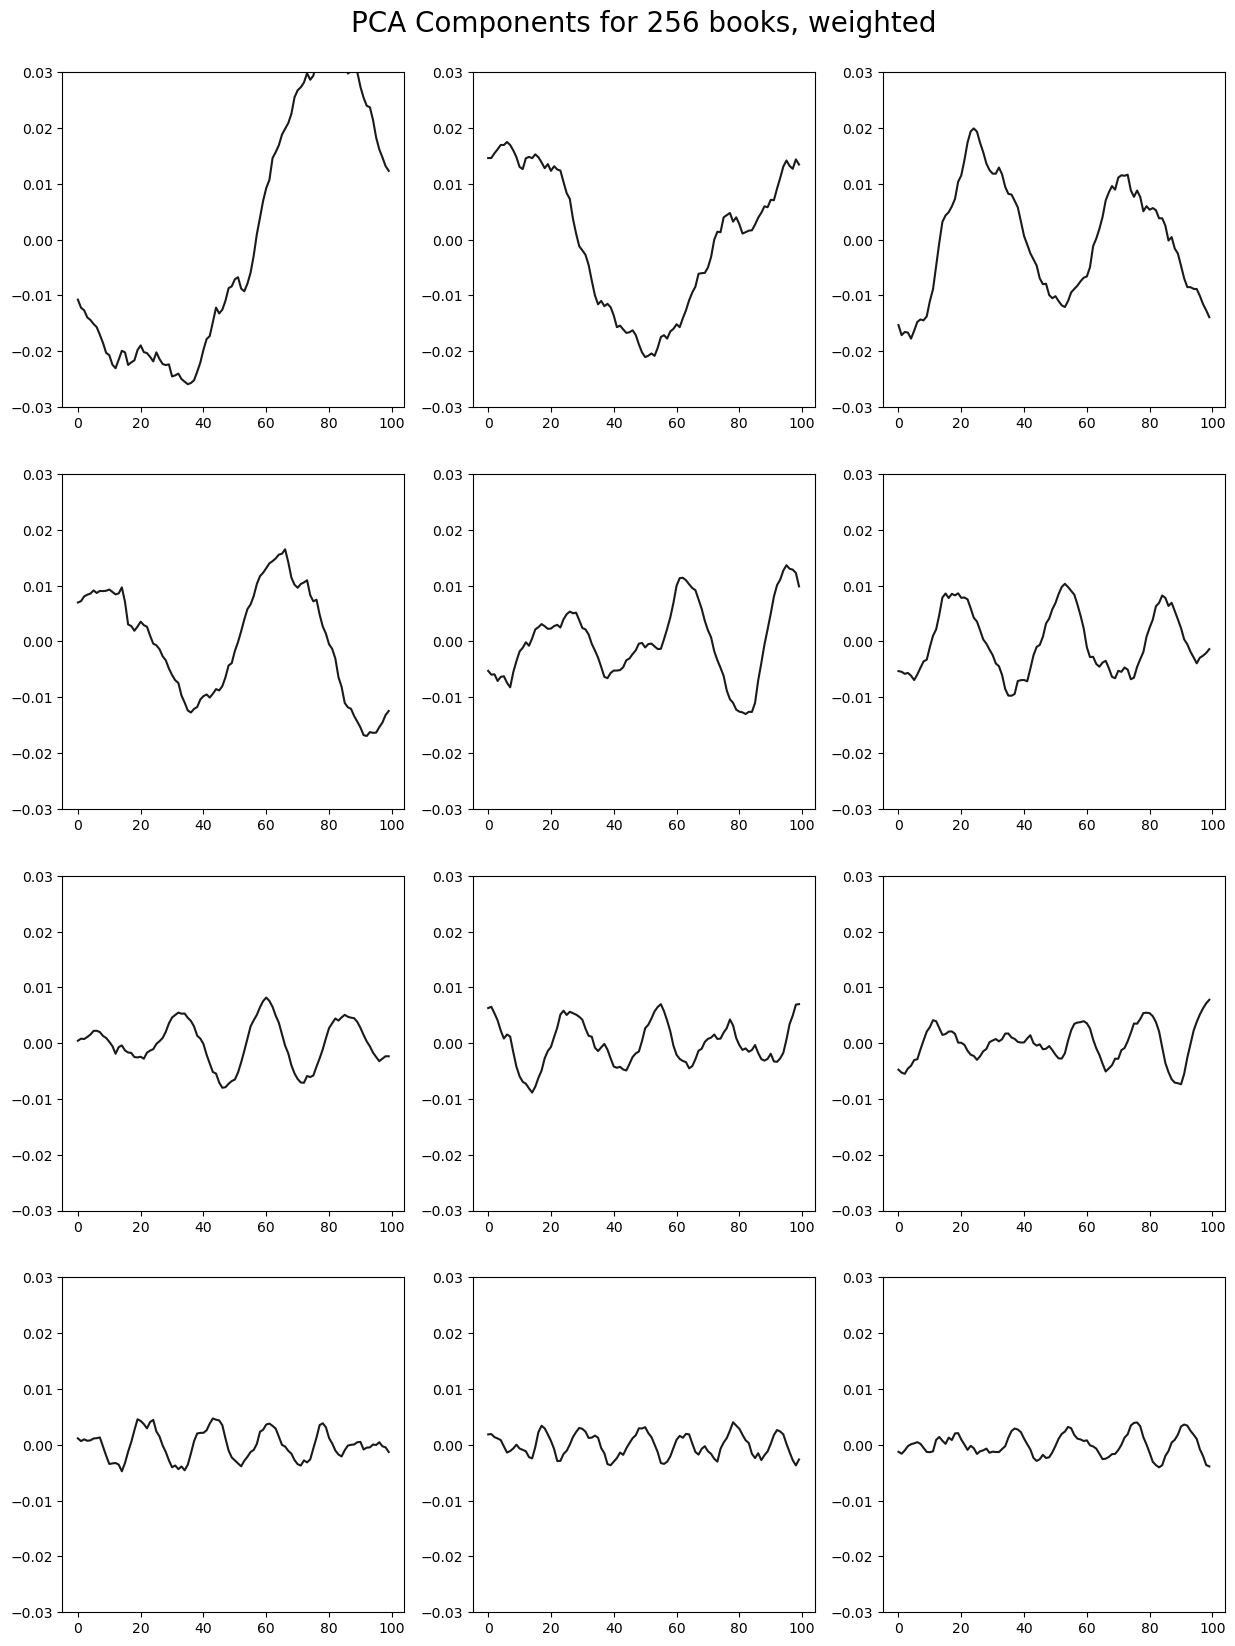

In [174]:

fig = plt.figure(figsize=(15,20))
for i in range(12):
    plt.subplot(4,3,i+1)
    plt.plot(pca.components_[i]*pca.explained_variance_ratio_[i],color=".1",linewidth=1.5)
    plt.ylim([-.03,.03])
plt.subplot(4,3,2)
plt.title("PCA Components for {} books, weighted\n".format(len(books)),fontsize=20)
# mysavefig('pca-MLEcomponents-first12.png')
# mysavefig("PCA-ncomponents-timeseries-weighted-mean0.pdf",folder="media/figures/SVD",openfig=False)

#%%


Text(0.5, 0, 'components')

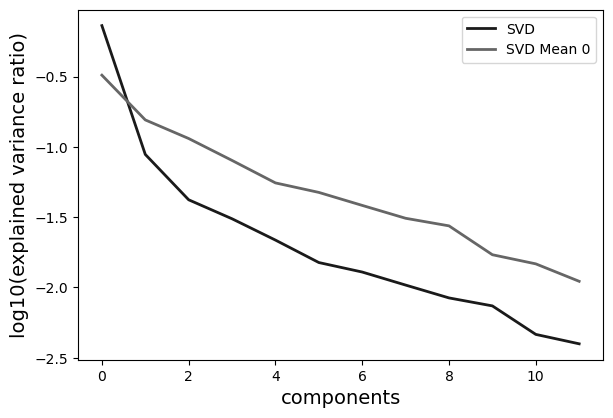

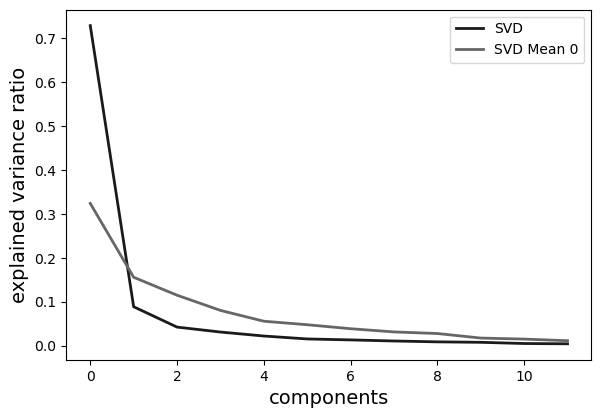

In [382]:
# pca = PCA(n_components='mle')
svd = TruncatedSVD(n_components=12,algorithm='arpack')
svd.fit(big_matrix)
# svd.n_components_

fig = plt.figure(figsize=(7.5,5))
ax1 = fig.add_axes([0.2,0.2,0.7,0.7])
ax1.plot(np.log10(svd.explained_variance_ratio_),linewidth=2,color=".1")


# pca = PCA(n_components='mle')
svd2 = TruncatedSVD(n_components=12,algorithm='arpack')
svd2.fit(big_matrix_mean0)
# svd.n_components_

ax1.plot(np.log10(svd2.explained_variance_ratio_),linewidth=2,color=".4")
ax1.legend(['SVD','SVD Mean 0'])
ax1.set_ylabel('log10(explained variance ratio)',fontsize=14)
ax1.set_xlabel('components',fontsize=14)
# mysavefig("SVD-variance.pdf",folder="media/figures/SVD",openfig=False)

fig = plt.figure(figsize=(7.5,5))
ax1 = fig.add_axes([0.2,0.2,0.7,0.7])
ax1.plot(svd.explained_variance_ratio_,linewidth=2,color=".1")
ax1.plot(svd2.explained_variance_ratio_,linewidth=2,color=".4")
ax1.legend(['SVD','SVD Mean 0'])
ax1.set_ylabel('explained variance ratio',fontsize=14)
ax1.set_xlabel('components',fontsize=14)
# mysavefig('svd-{0}components-30-50-explainedvariance-both.svg'.format(12))
# mysavefig('svd-{0}components-30-50-explainedvariance-both.png'.format(12))
# mysavefig("SVD-log10variance.pdf",folder="media/figures/SVD",openfig=False)

#%%


Text(0.5, 1.0, 'SVD Components for 139 books, unweighted\n')

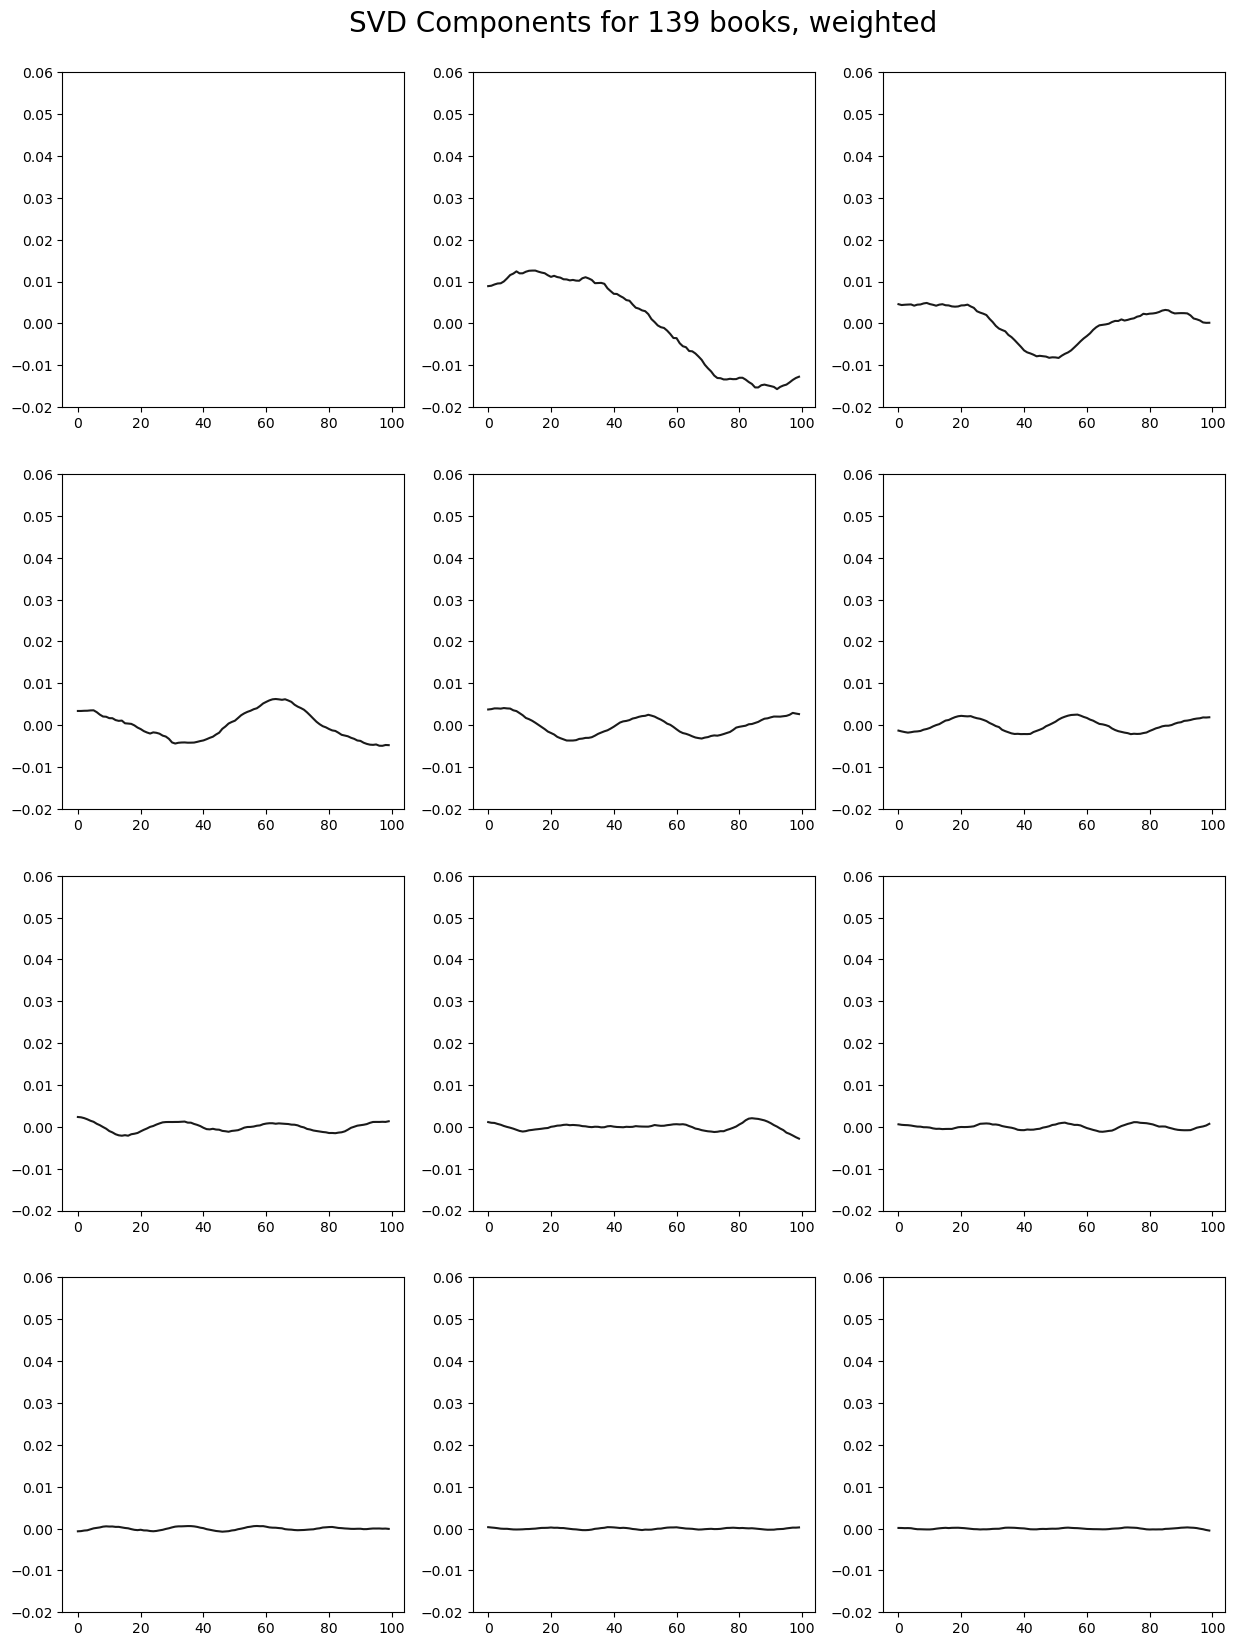

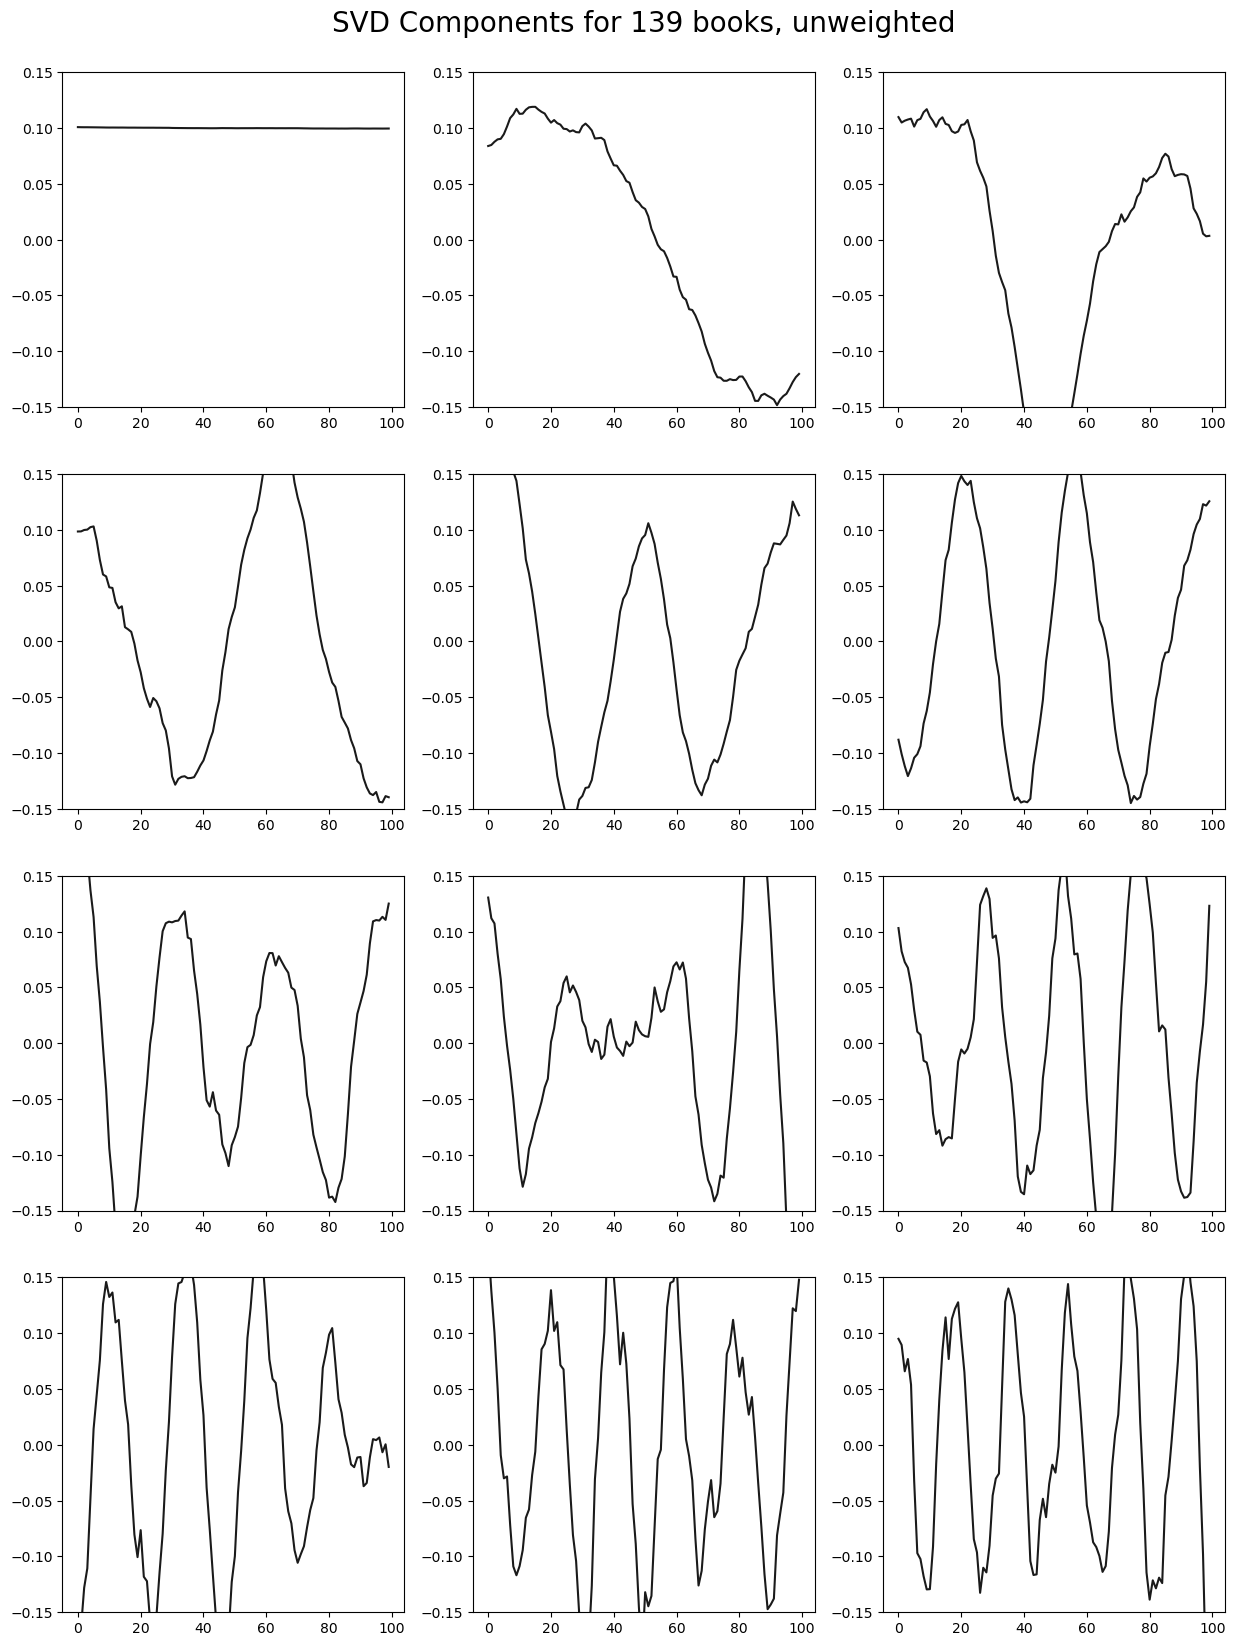

In [76]:
fig = plt.figure(figsize=(15,20))
for i in range(12):
    plt.subplot(4,3,i+1)
    plt.plot(svd.components_[i]*svd.explained_variance_ratio_[i],color=".1",linewidth=1.5)
    plt.ylim([-.02,.06])
plt.subplot(4,3,2)
plt.title("SVD Components for {} books, weighted\n".format(len(books)),fontsize=20)
# mysavefig('pca-MLEcomponents-first12.png')
# mysavefig("SVD-timeseries-weighted.pdf",folder="media/figures/SVD",openfig=False)

fig = plt.figure(figsize=(15,20))
for i in range(12):
    plt.subplot(4,3,i+1)
    plt.plot(svd.components_[i],color=".1",linewidth=1.5)
    plt.ylim([-.15,.15])
plt.subplot(4,3,2)
plt.title("SVD Components for {} books, unweighted\n".format(len(books)),fontsize=20)
# mysavefig('pca-MLEcomponents-first12.png')
# mysavefig("SVD-timeseries-unweighted.pdf",folder="media/figures/SVD",openfig=False)
#%%


Text(0.5, 1.0, 'SVD Mean 0 Components for 256 books, unweighted')

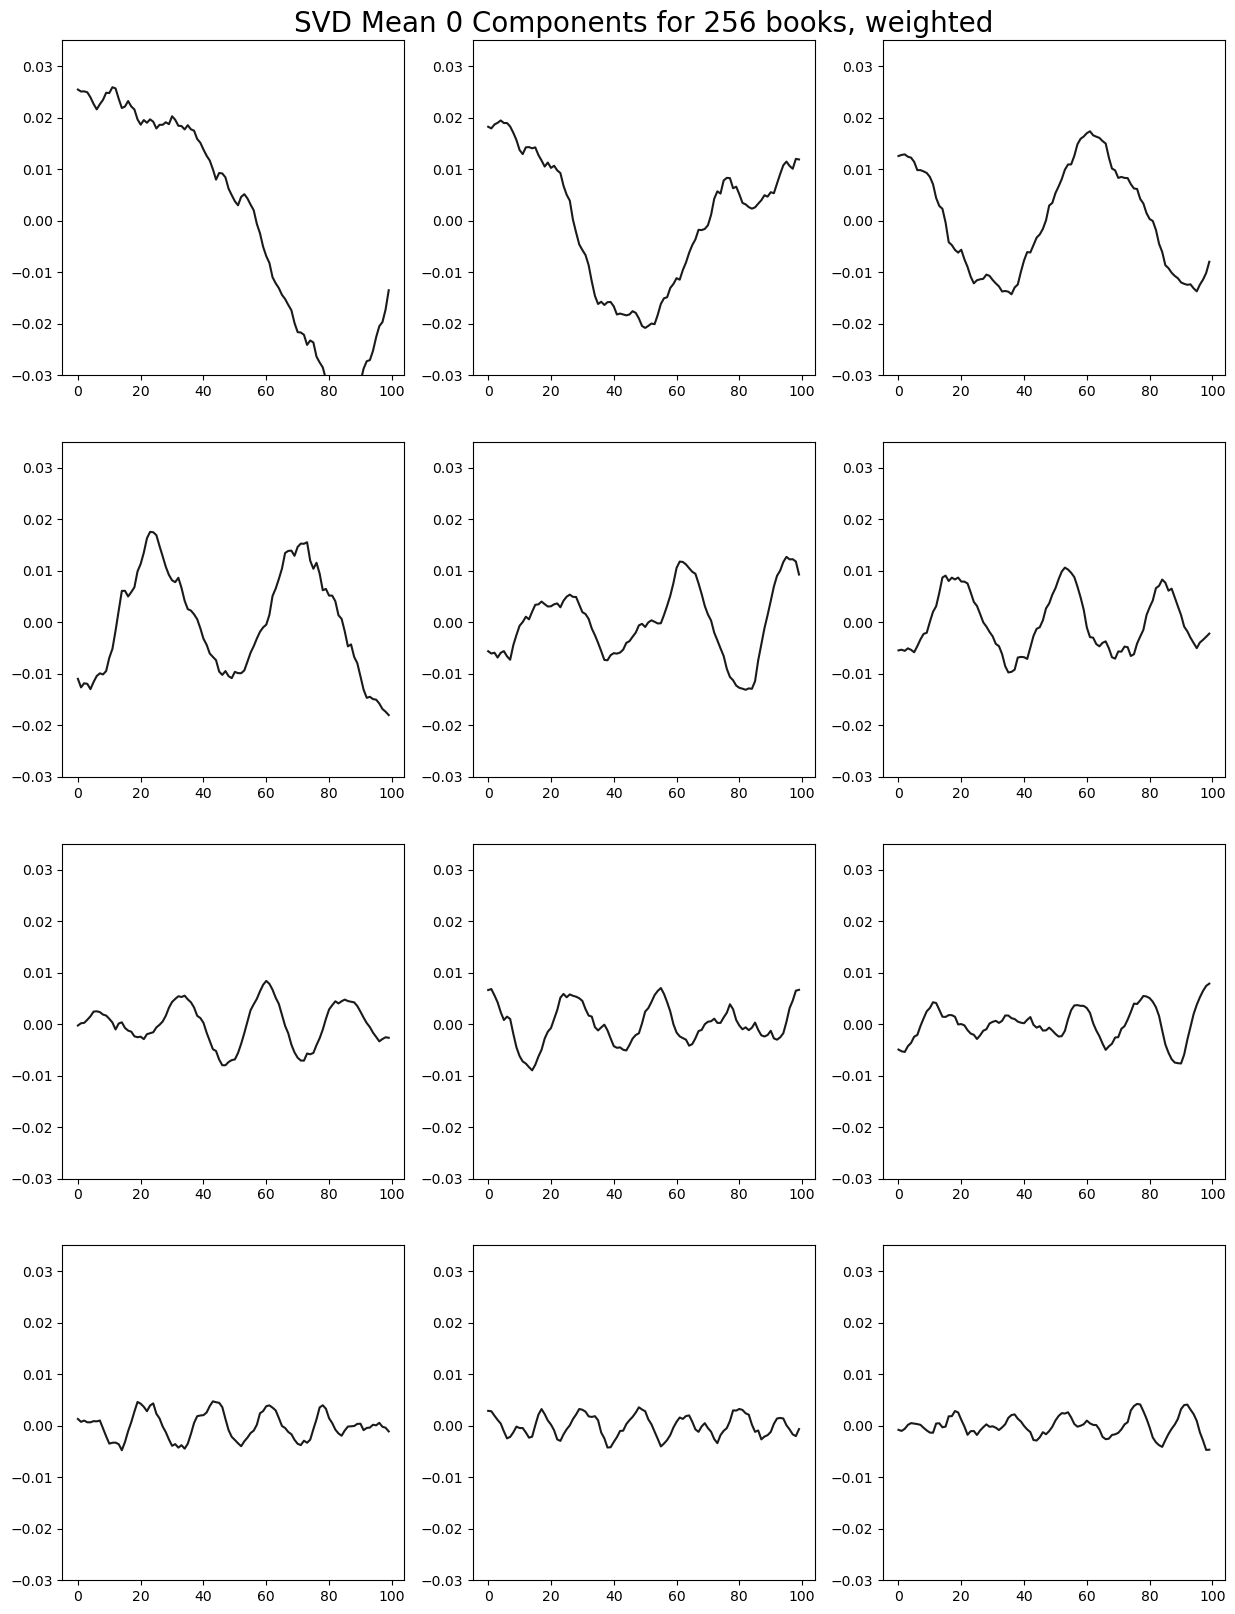

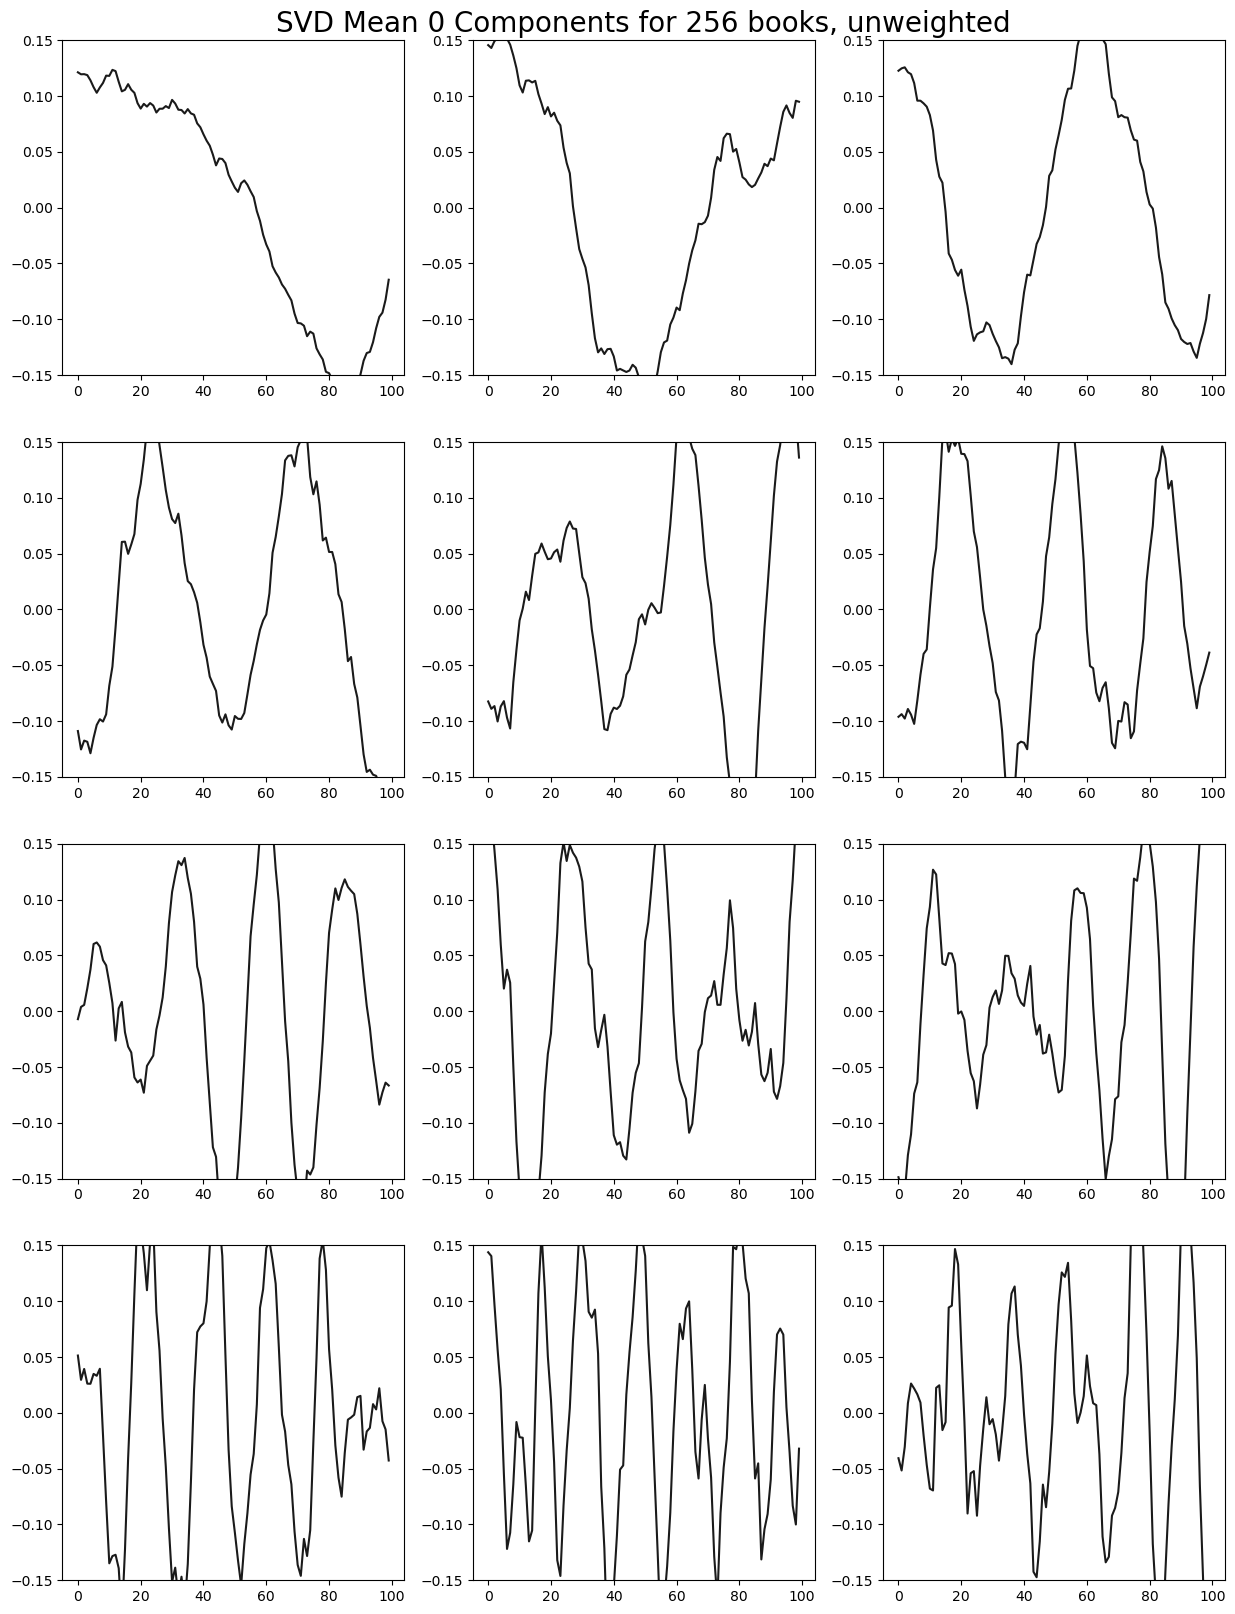

In [177]:
fig = plt.figure(figsize=(15,20))
for i in range(12):
    plt.subplot(4,3,i+1)
    plt.plot(svd2.components_[i]*svd2.explained_variance_ratio_[i],color=".1",linewidth=1.5)
    plt.ylim([-.03,.035])
plt.subplot(4,3,2)
plt.title("SVD Mean 0 Components for {} books, weighted".format(len(books)),fontsize=20)
# mysavefig('pca-MLEcomponents-first12.png')
# mysavefig("SVD-timeseries-weighted-mean0.pdf",folder="media/figures/SVD",openfig=False)

fig = plt.figure(figsize=(15,20))
for i in range(12):
    plt.subplot(4,3,i+1)
    plt.plot(svd2.components_[i],color=".1",linewidth=1.5)
    plt.ylim([-.15,.15])
plt.subplot(4,3,2)
plt.title("SVD Mean 0 Components for {} books, unweighted".format(len(books)),fontsize=20)
# mysavefig('pca-MLEcomponents-first12.png')
# mysavefig("SVD-timeseries-unweighted-mean0.pdf",folder="media/figures/SVD",openfig=False)


xwidth is 0.3
yheight is 0.22249999999999998


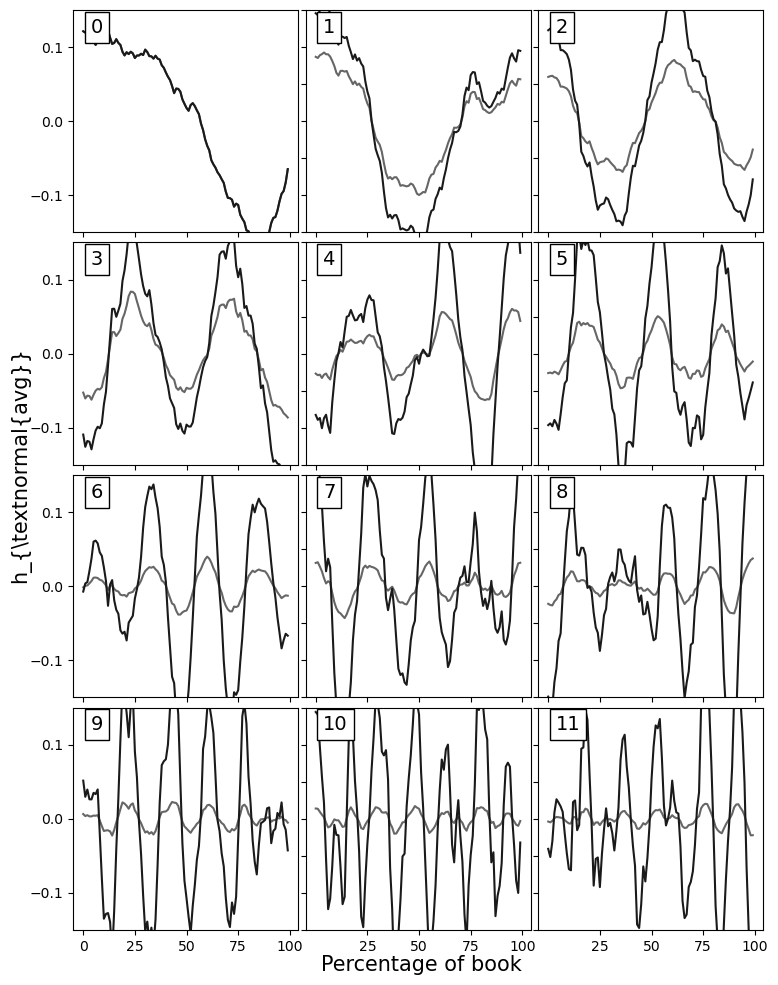

In [178]:

#%%
def mode_plot_tight(title,modes,submodes,saveas,ylim=.15):
    num_x = 3
    num_y = len(modes)/num_x
    xspacing = .01
    yspacing = .01
    xoffset = .07
    yoffset = .07
    xwidth = (1.-xoffset)/(num_x)-xspacing
    yheight = (1.-yoffset)/(num_y)-yspacing
    print('xwidth is {0}'.format(xwidth))
    print('yheight is {0}'.format(yheight))

    fig = plt.figure(figsize=(7.5,10))
    for i,mode in enumerate(modes):
#         print(i)
#         print("====")
#         print((i-i%num_x))
        # ind = np.argsort(w[:,sv+svstart])[-20:]
        ax1rect = [xoffset+(i%num_x)*(xspacing+xwidth),1.-yheight-yspacing-(int(np.floor((i-i%num_x)/num_x))*(yspacing+yheight)),xwidth,yheight]
        ax1 = fig.add_axes(ax1rect)
        # plt.subplot(4,3,i+1)
        ax1.plot(submodes[i],color=".4",linewidth=1.5)
        ax1.plot(modes[i],color=".1",linewidth=1.5)
        ax1.set_ylim([-ylim,ylim])
        if not i%num_x == 0:
            ax1.set_yticklabels([])
            if int(np.floor((i-i%num_x)/num_x)) == num_y-1:
                ax1.set_xticks([25,50,75,100])
        if not int(np.floor((i-i%num_x)/num_x)) == num_y-1:
            ax1.set_xticklabels([])
#         if int(np.floor((i-i%num_x)/num_x)) == num_y-1 and i%num_x == 1:
#             ax1.set_xlabel("Time")
#         if i == 0:
#             new_ticks = [x for x in ax1.yaxis.get_ticklocs()]
#             ax1.set_yticks(new_ticks)
#             new_ticklabels = [str(x) for x in new_ticks]
#             new_ticklabels[-1] = "Happs"
#             # ax1.set_yticklabels(new_ticklabels)
        props = dict(boxstyle='square', facecolor='white', alpha=1.0)
        # fig.text(ax1rect[0]+.03/xwidth, ax1rect[1]+ax1rect[3]-.03/yheight, letters[i],
        my_ylim = [-ylim,ylim]
        ax1.text(.035*num_points, my_ylim[0]+.965*(my_ylim[1]-my_ylim[0]), "{0}".format(i),
                     fontsize=14,
                     verticalalignment='top',
                     horizontalalignment='left',
                     bbox=props)
        if i%num_x == 0:
            # new_ticks = [x for x in ax1.yaxis.get_ticklocs()]
            # ax1.set_yticks(new_ticks[:-2])
            ax1.set_yticks([-.1,0,.1])
    fig.text((1.-xoffset)/2.+xoffset,yoffset/2.,"Percentage of book",verticalalignment='center', horizontalalignment='center',fontsize=15) #,horizontalalign="center")    
    # plt.subplot(4,3,2)
    fig.text(0,(1.-yoffset)/2.+yoffset,r"h_{\textnormal{avg}}",verticalalignment='center', horizontalalignment='center',fontsize=15,rotation=90) #,horizontalalign="center"
    
    # mysavefig('pca-MLEcomponents-first12.png')
    # mysavefig(saveas,folder="media/figures/SVD",openfig=False)
    
weighted = [svd2.components_[i]*svd2.explained_variance_ratio_[i]/svd2.explained_variance_ratio_[0] for i in range(12)]
mode_plot_tight("SVD Mean 0 Components for {} books, unweighted".format(len(books)),svd2.components_,weighted,"SVD-timeseries-unweighted-mean0.pdf")

#%%


Text(0.5, 0, 'components')

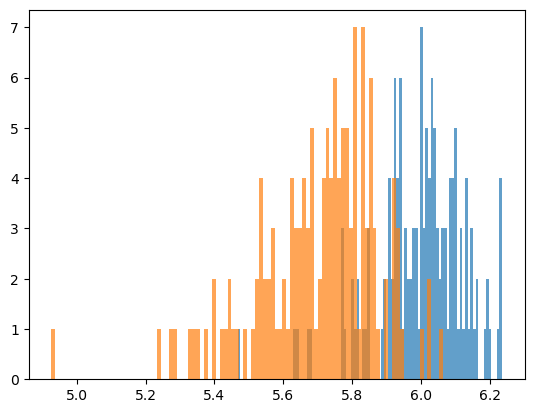

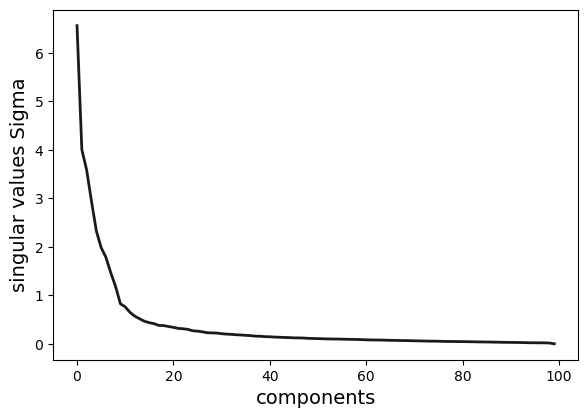

In [432]:
allMax = np.amax(big_matrix,axis=1)
allMin = np.amin(big_matrix,axis=1)
plt.hist(allMax,bins=100,alpha=0.7)
plt.hist(allMin,bins=100,alpha=0.7)
#%%
U,S,V = np.linalg.svd(big_matrix_mean0,full_matrices=True,compute_uv=True)
fig = plt.figure(figsize=(7.5,5))
ax1 = fig.add_axes([0.2,0.2,0.7,0.7])
ax1.plot(S,linewidth=2,color=".1")
ax1.set_ylabel('singular values Sigma',fontsize=14)
ax1.set_xlabel('components',fontsize=14)
# mysavefig('pca-{0}components-explainedvariance-mean0.png'.format(pca.n_components_))
# mysavefig("SVD-variance-numpy.pdf",folder="media/figures/SVD",openfig=False)


Text(0.5, 0, 'components')

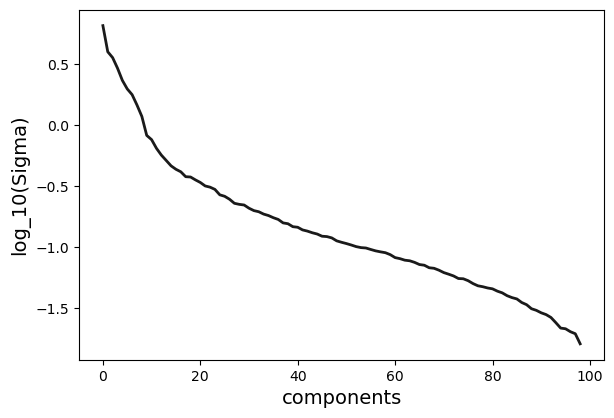

In [433]:

fig = plt.figure(figsize=(7.5,5))
ax1 = fig.add_axes([0.2,0.2,0.7,0.7])
ax1.plot(np.log10(S[:-1]),color=".1",linewidth=2)
ax1.set_ylabel('log_10(Sigma)',fontsize=14)
ax1.set_xlabel('components',fontsize=14)
# mysavefig('pca-{0}components-explainedvariance-mean0.png'.format(pca.n_components_))
# mysavefig("SVD-log10variance-numpy.pdf",folder="media/figures/SVD",openfig=False)
#%%


In [434]:
print(U.shape)
print(S.shape)
print(V.shape)
#%%


(139, 139)
(100,)
(100, 100)


Text(0.5, 1.0, 'SVD Mean 0 Components for 193 books, weighted\n')

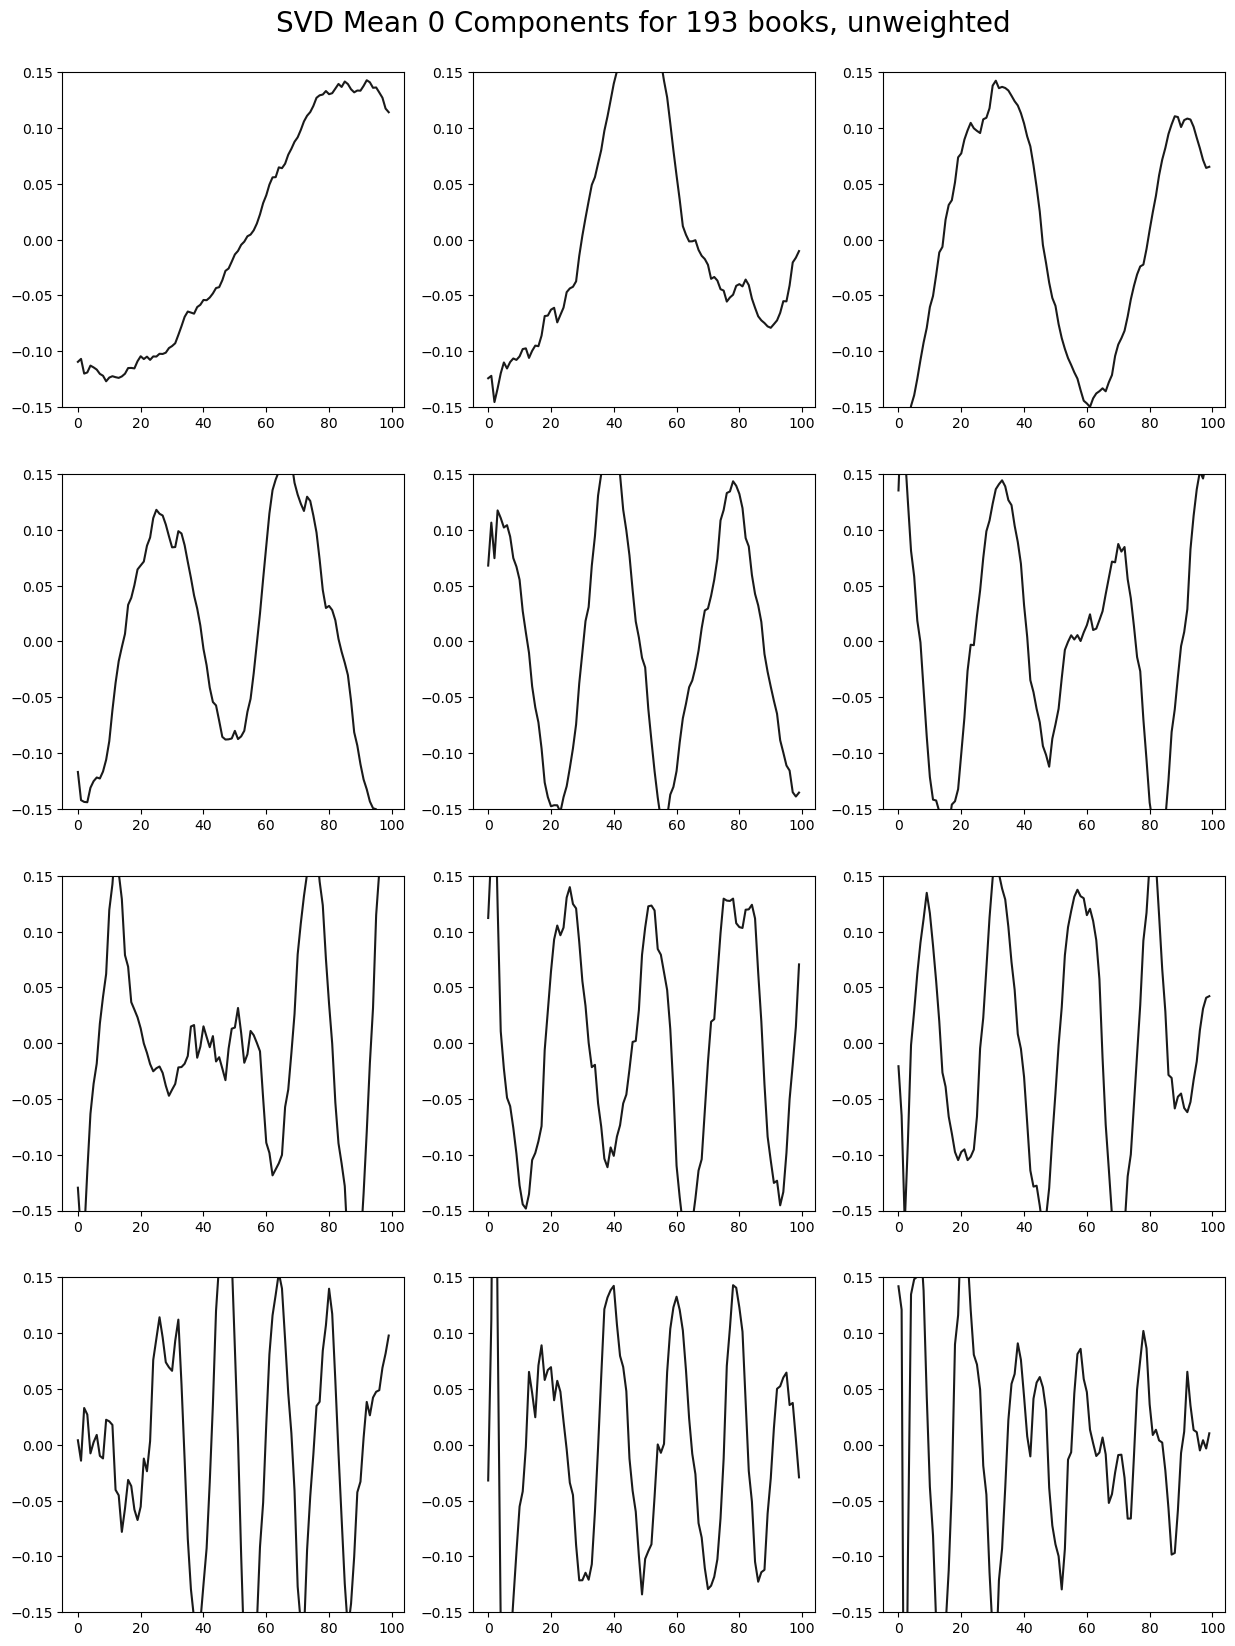

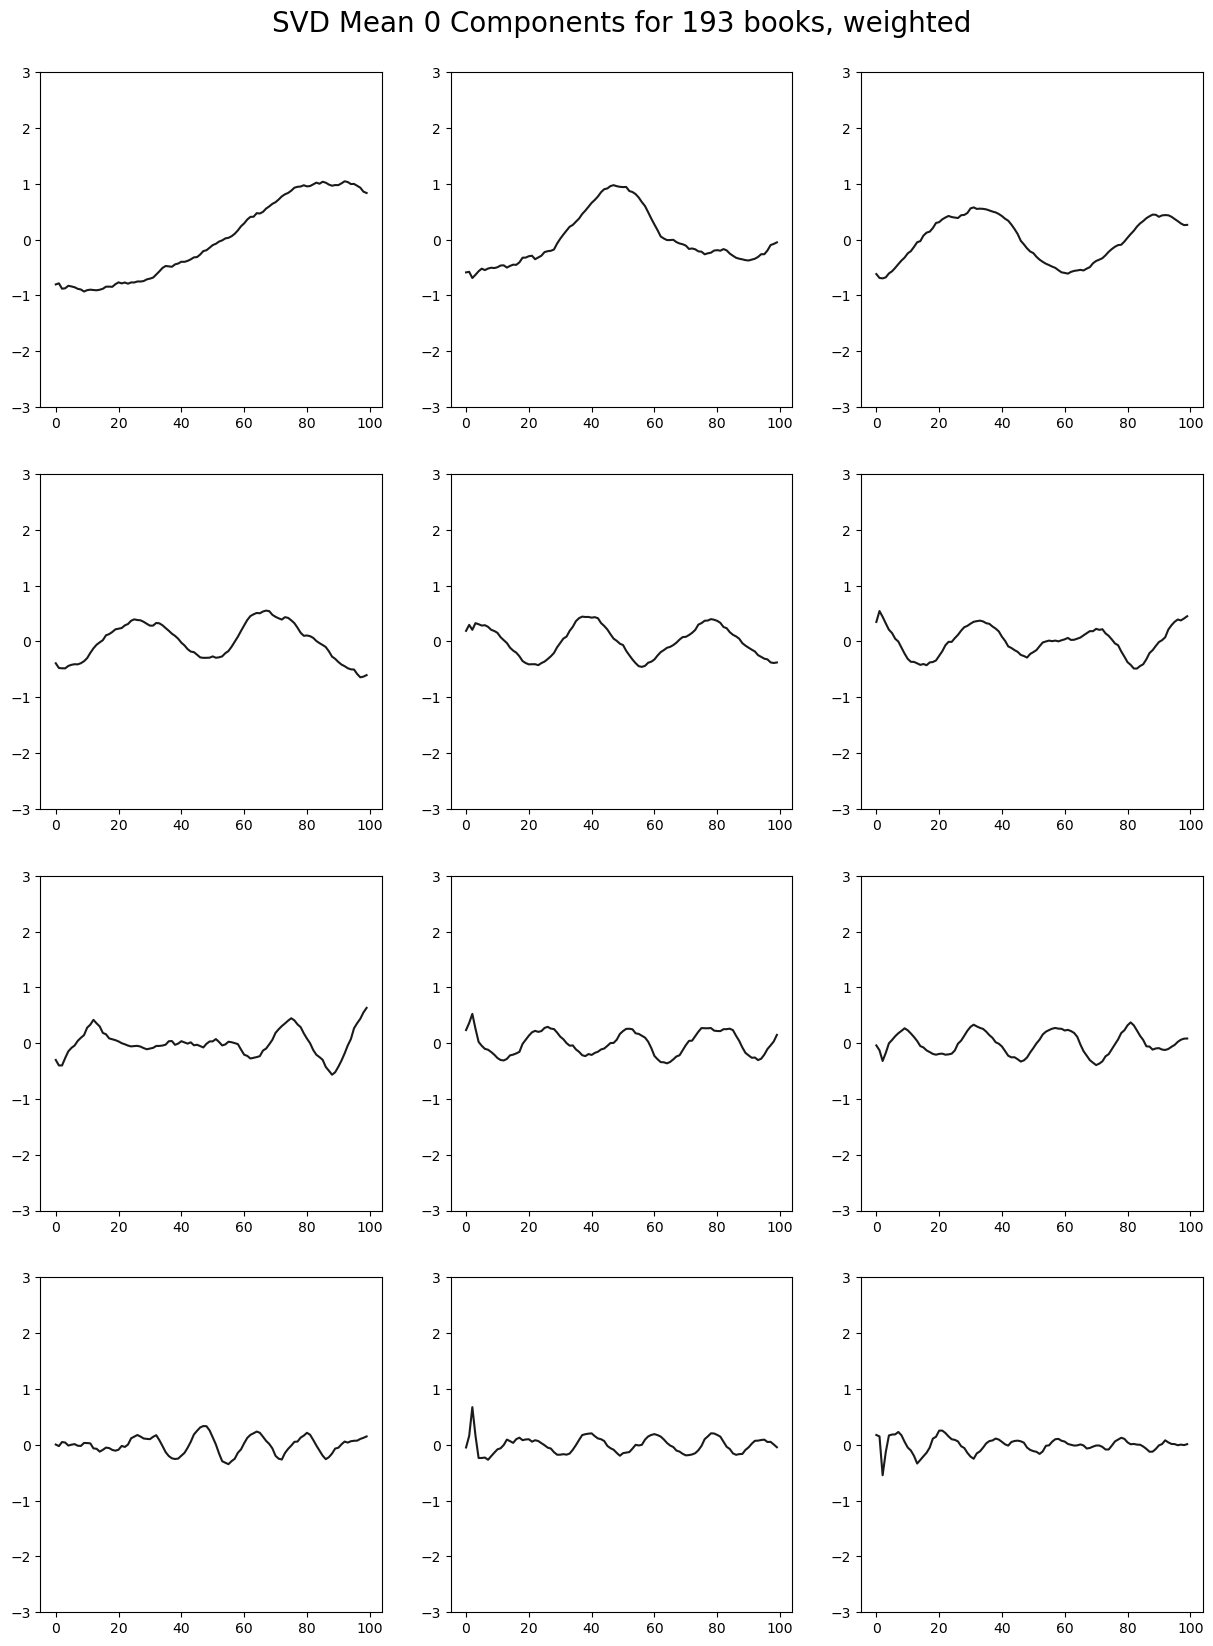

In [388]:
fig = plt.figure(figsize=(15,20))
for i in range(12):
    plt.subplot(4,3,i+1)
    plt.plot(V[i,:],color=".1",linewidth=1.5)
    plt.ylim([-.15,.15])
plt.subplot(4,3,2)
plt.title("SVD Mean 0 Components for {} books, unweighted\n".format(len(books)),fontsize=20)
# mysavefig('pca-MLEcomponents-first12.png')
# mysavefig("SVD-timeseries-unweighted-mean0-numpy.pdf",folder="media/figures/SVD",openfig=False)

fig = plt.figure(figsize=(15,20))
for i in range(12):
    plt.subplot(4,3,i+1)
    plt.plot(V[i,:]*S[i],color=".1",linewidth=1.5)
    plt.ylim([-3,3])
plt.subplot(4,3,2)
plt.title("SVD Mean 0 Components for {} books, weighted\n".format(len(books)),fontsize=20)
# mysavefig("SVD-timeseries-weighted-mean0-numpy.pdf",folder="media/figures/SVD",openfig=False)

#%%


(193, 100)
-0.033222267375730925
1.8378234786395173


Text(0, 0.5, 'contribution')

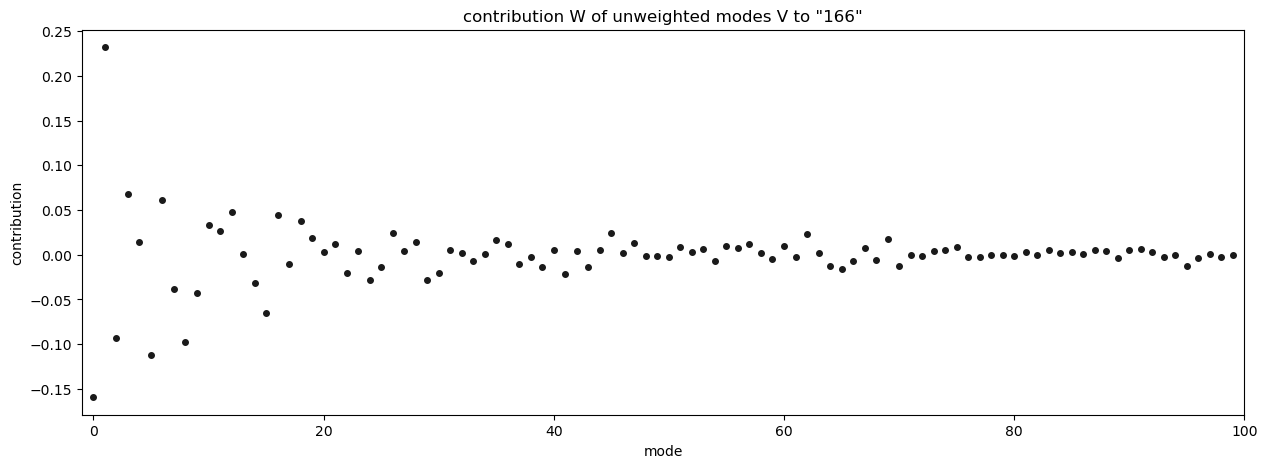

In [389]:
#using the usv to examine mode contributions
# print(U[0,0]*S[0])
# print(U[0,:200]*S)
w = U[:,:num_points]*S
# each row entry of w are the contribution of each mode to the timeseries for book i
# where all of book i's entries are in row i
# so, the contribution from mode 1 to all books is column 1
print(w.shape)

i = 5
print(w[i,:].sum())
print(np.abs(w[i,:]).sum())
plt.figure(figsize=(15,5))
plt.plot(w[i,:],".",color=".1",linewidth=1,markersize=8)
plt.xlim([-1,num_points])
plt.title('contribution W of unweighted modes V to "{0}"'.format(books[i].title))
plt.xlabel('mode')
plt.ylabel('contribution')
# mysavefig("SVD-coeff-W-unweighted.pdf",folder="media/figures/SVD",openfig=False)


Text(0, 0.5, 'cum abs unweigted contribution')

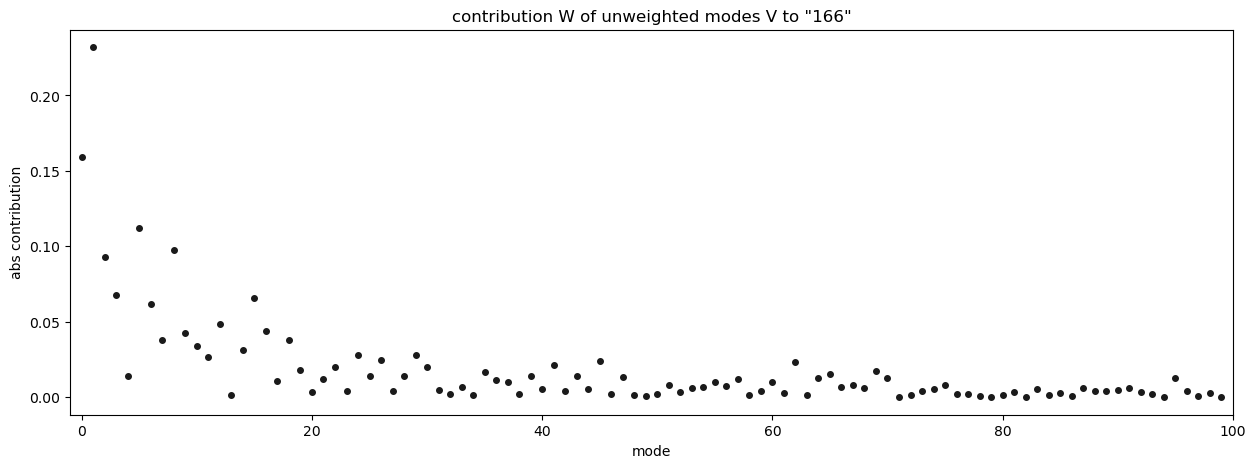

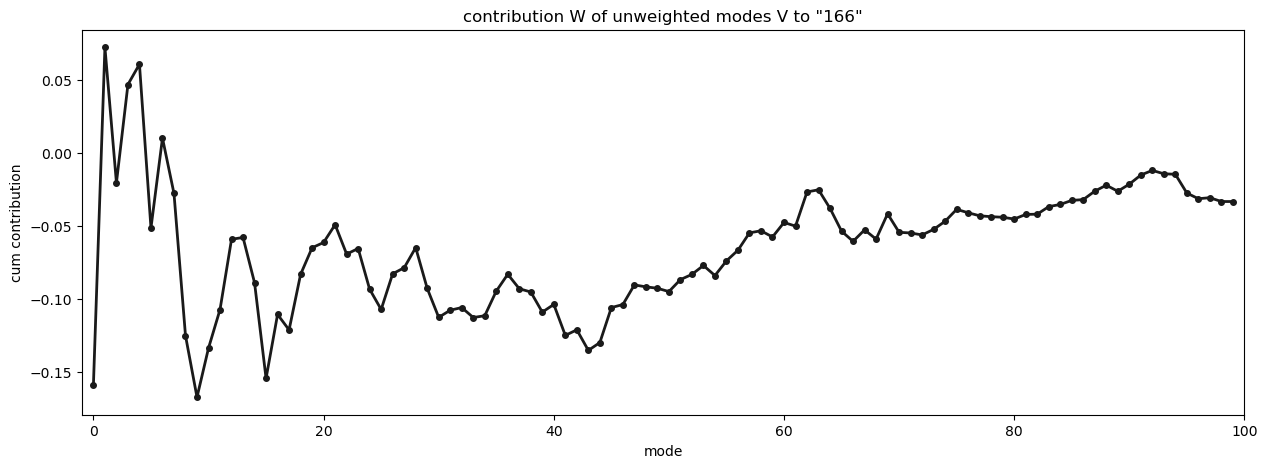

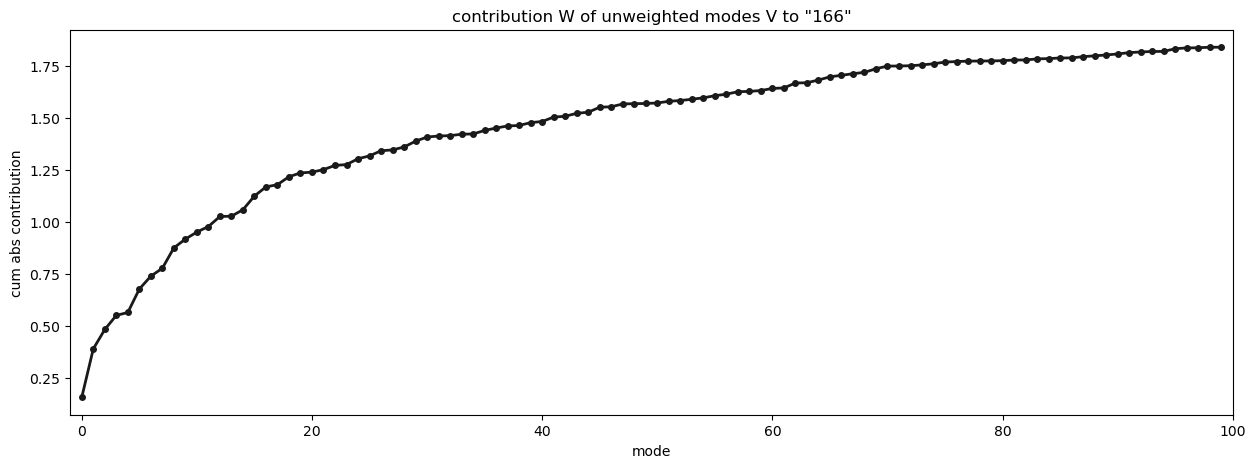

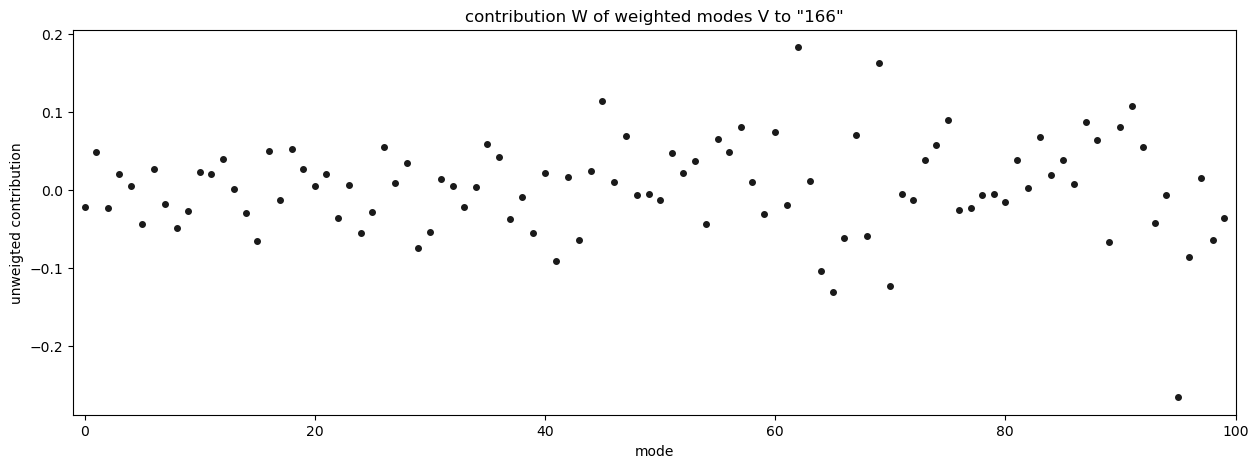

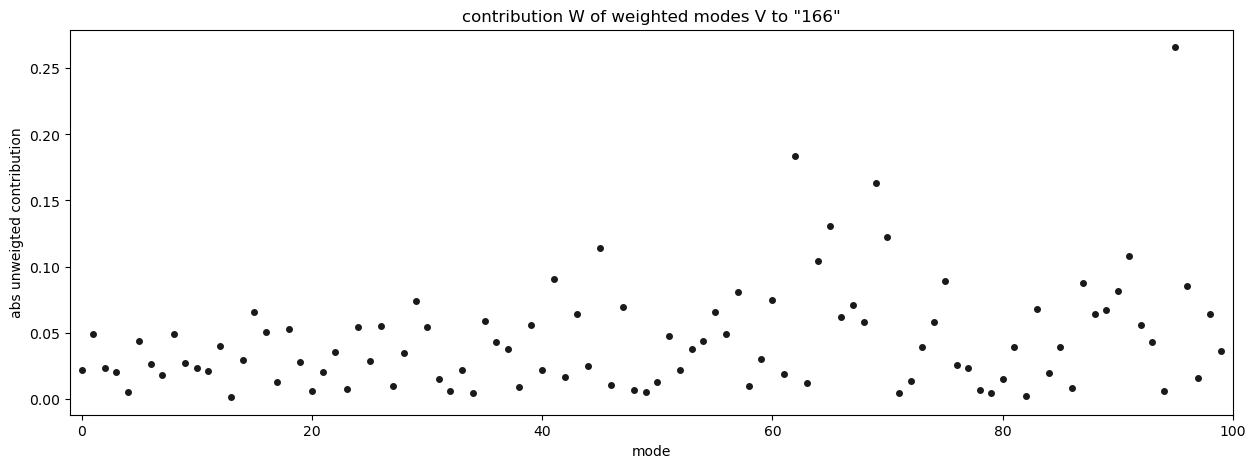

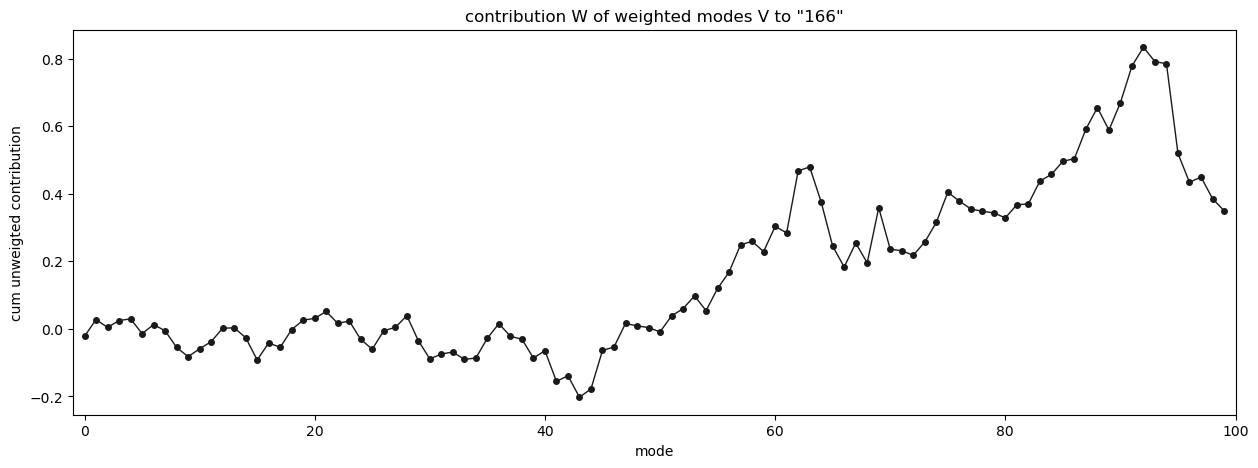

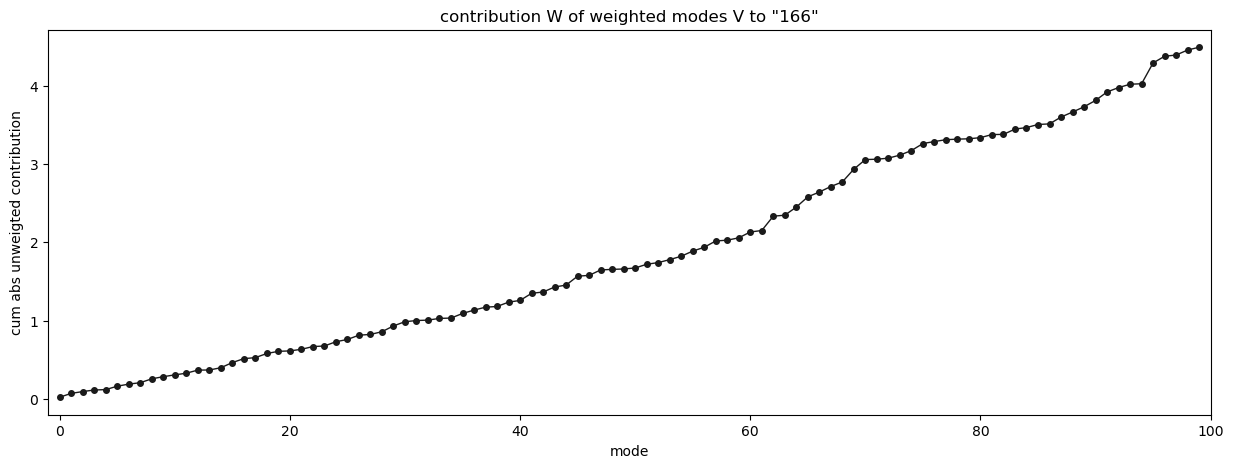

In [390]:

plt.figure(figsize=(15,5))
plt.plot(np.abs(w[i,:]),".",color=".1",linewidth=1,markersize=8)
plt.xlim([-1,num_points])
plt.title('contribution W of unweighted modes V to "{0}"'.format(books[i].title))
plt.xlabel('mode')
plt.ylabel('abs contribution')
# mysavefig("SVD-coeff-W-unweighted-abs.pdf",folder="media/figures/SVD",openfig=False)

plt.figure(figsize=(15,5))
plt.plot(np.cumsum(w[i,:]),".-",color=".1",linewidth=2,markersize=8)
plt.xlim([-1,num_points])
plt.title('contribution W of unweighted modes V to "{0}"'.format(books[i].title))
plt.xlabel('mode')
plt.ylabel('cum contribution')
# mysavefig("SVD-coeff-W-unweighted-cumsum.pdf",folder="media/figures/SVD",openfig=False)

plt.figure(figsize=(15,5))
plt.plot(np.cumsum(np.abs(w[i,:])),".-",color=".1",linewidth=2,markersize=8)
plt.xlim([-1,num_points])
plt.title('contribution W of unweighted modes V to "{0}"'.format(books[i].title))
plt.xlabel('mode')
plt.ylabel('cum abs contribution')
# mysavefig("SVD-coeff-W-unweighted-abs-cumsum.pdf",folder="media/figures/SVD",openfig=False)


plt.figure(figsize=(15,5))
plt.plot(U[i,:num_points],".",color=".1",linewidth=1,markersize=8)
plt.xlim([-1,num_points])
plt.title('contribution W of weighted modes V to "{0}"'.format(books[i].title))
plt.xlabel('mode')
plt.ylabel('unweigted contribution')
# mysavefig("SVD-coeff-W-weighted.pdf",folder="media/figures/SVD",openfig=False)

plt.figure(figsize=(15,5))
plt.plot(np.abs(U[i,:num_points]),".",color=".1",linewidth=1,markersize=8)
plt.xlim([-1,num_points])
plt.title('contribution W of weighted modes V to "{0}"'.format(books[i].title))
plt.xlabel('mode')
plt.ylabel('abs unweigted contribution')
# mysavefig("SVD-coeff-W-weighted-abs.pdf",folder="media/figures/SVD",openfig=False)

plt.figure(figsize=(15,5))
plt.plot(np.cumsum(U[i,:num_points]),".-",color=".1",linewidth=1,markersize=8)
plt.xlim([-1,num_points])
plt.title('contribution W of weighted modes V to "{0}"'.format(books[i].title))
plt.xlabel('mode')
plt.ylabel('cum unweigted contribution')
# mysavefig("SVD-coeff-W-weighted-cumsum.pdf",folder="media/figures/SVD",openfig=False)

plt.figure(figsize=(15,5))
plt.plot(np.cumsum(np.abs(U[i,:num_points])),".-",color=".1",linewidth=1,markersize=8)
plt.xlim([-1,num_points])
plt.title('contribution W of weighted modes V to "{0}"'.format(books[i].title))
plt.xlabel('mode')
plt.ylabel('cum abs unweigted contribution')
# mysavefig("SVD-coeff-W-weighted-abs-cumsum.pdf",folder="media/figures/SVD",openfig=False)

#%%


In [391]:
np.abs(w[:10,:]).sum(axis=1)
#%%
# squeeze w into the right shape
# transpose doesn't really do it
t = np.dot(np.reshape(w[0,:],(1,num_points)),V)
print(np.reshape(w[0,:],(1,num_points)).shape)
print(V.shape)
print(t.shape)
# squeeze w into the right shape
# transpose doesn't really do it
t = np.dot(w,V)
print(V.shape)
print(t.shape)

(1, 100)
(100, 100)
(1, 100)
(100, 100)
(193, 100)


Normalization of W

In [435]:
w = U[:,:num_points]*S
w_abs = np.abs(w)
w_normalized = np.multiply(w,np.tile(1./w_abs.sum(axis=1),(num_points,1)).transpose())

In [436]:
print(S[0])
num_x = 3
num_y = 12/num_x
xspacing = .01
yspacing = .01
xoffset = .07
yoffset = .07
xwidth = (1.-xoffset)/(num_x)-xspacing
yheight = (1.-yoffset)/(num_y)-yspacing
print('xwidth is {0}'.format(xwidth))
print('yheight is {0}'.format(yheight))
ylim = .15

fig = plt.figure(figsize=(8.5,10))
for i in range(12):
#         print(i)
#         print("====")
#         print((i-i%num_x))
    # ind = np.argsort(w[:,sv+svstart])[-20:]
    ax1rect = [xoffset+(i%num_x)(xspacing+xwidth),1.-yheight-yspacing-(int(np.floor((i-i%num_x)/num_x))(yspacing+yheight)),xwidth*.9,yheight]
    ax2rect = ax1rect.copy()
    ax2rect[0] += ax1rect[2]
    ax2rect[2] = (1-.9)*xwidth
    ax1 = fig.add_axes(ax1rect)
    ax2 = fig.add_axes(ax2rect)
    ax2.set_ylim([-1,1])
    ax2.set_xlim([.5,1.5])
    w_subset = np.random.choice(w_normalized[:,i],400)
    x_values = .55+.9*np.random.rand(400)
    ax2.scatter(x_values,
                w_subset,
                facecolor="k",
                edgecolor=None,
                linewidth=0.0,
                s=3.5,
                # edgewidth=0.0,
                alpha=0.1)
    ax2.scatter(x_values,
                w_subset,
                facecolor="k",
                edgecolor=None,
                linewidth=0.0,
                s=.7,
                # edgewidth=0.0,
                alpha=0.7)
#     p = [np.percentile(w_normalized[:,i],50),
#          np.percentile(w_normalized[:,i],50),
#          np.percentile(w_normalized[:,i],50)]
    boxprops = dict(linestyle='-', linewidth=1.0, color='k')
    medianprops = dict(linestyle='--', linewidth=1.0, color='k')
    # meanlineprops = dict(linestyle='--', linewidth=2.5, color='purple')
    ax2.boxplot(w_normalized[:,i],
               showfliers=False,
               boxprops=boxprops,
               medianprops=boxprops,
               whiskerprops=medianprops,
               widths=.9)
    ax2.set_xticks([])
    ax2.set_yticks([])
    ax2.set_xticklabels([])
    ax2.set_yticklabels([])
    # plt.subplot(4,3,i+1)
    ax1.plot(np.arange(0,100,0.5),V[i,:]*S[i]/S[0],color=".5",linewidth=1.5)
    ax1.plot(np.arange(0,100,0.5),V[i,:],color=".1",linewidth=1.5)
    ax1.set_ylim([-ylim,ylim])
    if not i%num_x == 0:
        ax1.set_yticklabels([])
    if i%num_x == (num_x-1):
        ax2.yaxis.tick_right()
        ax2.set_yticks([-.5,0,.5])
        ax2.set_yticklabels([-.5,0,.5])
#         if int(np.floor((i-i%num_x)/num_x)) == num_y-1:
#             ax1.set_xticks([25,50,75])
    if not int(np.floor((i-i%num_x)/num_x)) == num_y-1:
        ax1.set_xticklabels([])
#         if int(np.floor((i-i%num_x)/num_x)) == num_y-1 and i%num_x == 1:
#             ax1.set_xlabel("Time")
#         if i == 0:
#             new_ticks = [x for x in ax1.yaxis.get_ticklocs()]
#             ax1.set_yticks(new_ticks)
#             new_ticklabels = [str(x) for x in new_ticks]
#             new_ticklabels[-1] = "Happs"
#             # ax1.set_yticklabels(new_ticklabels)
    props = dict(boxstyle='square', facecolor='white', alpha=1.0)
    # fig.text(ax1rect[0]+.03/xwidth, ax1rect[1]+ax1rect[3]-.03/yheight, letters[i],
    my_ylim = ax1.get_ylim()
    # my_ylim = [-ylim,ylim]
    ax1.text(.035*100, my_ylim[0]+.965*(my_ylim[1]-my_ylim[0]), "Mode {0}".format(i+1),
                 fontsize=14,
                 verticalalignment='top',
                 horizontalalignment='left',
                 bbox=props)
    if i%num_x == 0:
        # new_ticks = [x for x in ax1.yaxis.get_ticklocs()]
        # ax1.set_yticks(new_ticks[:-2])
        ax1.set_yticks([-.1,0,.1])
        
fig.text((1.-xoffset)/2.+xoffset,yoffset/2.,"Percentage of book",verticalalignment='center', horizontalalignment='center',fontsize=15) #,horizontalalign="center")    
# plt.subplot(4,3,2)
# fig.text(0,(1.-yoffset)/2.+yoffset,r"Mode space $h_{\textnormal{avg}}$",verticalalignment='center', horizontalalignment='center',fontsize=15,rotation=90) #,horizontalalign="center"
# fig.text(1.05,(1.-yoffset)/2.+yoffset,r"Within-book normalized mode coefficients",verticalalignment='center', horizontalalignment='center',fontsize=15,rotation=-90) #,horizontalalign="center"
# fig.text(0.02,(1.-yoffset)/2.+yoffset,r"""Mode
# space
# $h_{\textnormal{avg}}$""",verticalalignment='center', horizontalalignment="right",fontsize=15,rotation=0) #,horizontalalign="center"
fig.text(0.02,(1.-yoffset)/2.+yoffset,r"""Right
singular
vectors
(modes)""",verticalalignment='center', horizontalalignment="right",fontsize=15,rotation=0) #,horizontalalign="center"
fig.text(1.01,(1.-yoffset)/2.+yoffset,"""Mode
coefficients
from $W$""",verticalalignment='center', horizontalalignment='left',fontsize=15,rotation=0) #,horizontalalign="center"

mysavefig("SVD-timeseries-unweighted-mean0.pdf",folder=this_dir,openfig=True)

6.561794094404972
xwidth is 0.3
yheight is 0.22249999999999998


TypeError: 'int' object is not callable

<Figure size 850x1000 with 0 Axes>

In [437]:
num_modes = 10

core_emotional_arcs = [sorted(zip(w_normalized[i,:],
                                  range(1,len(w_normalized[i,:])+1)),
                              key=lambda x: np.abs(x[0]),
                              reverse=True) for i,b in enumerate(books)]

In [438]:
w_df = pd.DataFrame(w_normalized[:, 0:10])

In [439]:
from sklearn.cluster import AgglomerativeClustering
import numpy as np


model = AgglomerativeClustering(distance_threshold=0 , linkage='ward', n_clusters=None)

model = model.fit(w_df)

In [440]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)



### Clustering the data

In [774]:

n_clusters = 5
random.seed(10)
kmeanModel = KMeans(n_clusters=n_clusters)
aggModel = AgglomerativeClustering(linkage='ward', n_clusters=n_clusters)
clusters_k_normalized = kmeanModel.fit_predict(w_df)
#clusters_k = kmeanModel.fit_predict(pd.DataFrame(w).iloc[:,0:10])
clusters_agg_normalized = aggModel.fit_predict(w_df)
clusters_agg = aggModel.fit_predict(pd.DataFrame(w).iloc[:,0:10])

/Users/ericfrey/opt/anaconda3/envs/gutenberg/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [776]:
final_df = booksData
final_df = pd.concat([final_df.reset_index(), pd.Series(clusters_k_normalized, name='arc').astype('str')], axis=1)
final_df = final_df.assign(WWI=pd.cut(final_df['publish_date'], 
                               bins=[0, 1914, 1918, 2000], 
                               labels=['Before', 'During', 'After']))
final_df['proportion'] = final_df.groupby(['WWI','arc'])['word_count'].transform('count')/final_df.groupby('WWI')['word_count'].transform('count')

### Before and after proportion of overall stories told

In [777]:
import plotly.express as xp

xp.bar(final_df[final_df.WWI != 'During'].groupby(['WWI','arc']).agg({'arc':'first', 'WWI':'first', 'proportion':'first'}).dropna(), x='WWI', y='proportion', color='arc',  facet_col='arc',
       labels={
    'proportion' : 'Proportion of Stories'
       })


In [773]:
import pandas as pd
import plotly.graph_objects as go
#cluster_matrix = pd.concat([pd.DataFrame(big_matrix ) , pd.Series(clusters, name='arc')], axis=1)

cluster_matrix = pd.concat([pd.DataFrame(big_matrix), final_df.arc.astype(int)], axis=1)
transposed = cluster_matrix.drop('arc',axis=1).transpose()
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
scaled_matrix = pd.concat([pd.DataFrame(ss.fit_transform(transposed)).transpose(), cluster_matrix.arc.reset_index()], axis=1)


scaled_matrix = pd.melt(scaled_matrix, id_vars=['arc','index'])

scaled_matrix.rename({"value":"Sentiment (scaled)","variable":"Pct of Book"}, axis=1, inplace=True)


fig = px.scatter(scaled_matrix, x="Pct of Book", y="Sentiment (scaled)", category_orders={'arc':[0,1,2,3,4]}, facet_col="arc", title='Story Arcs Clustered into {} Core Arcs'.format(n_clusters),  trendline="lowess", trendline_options=dict(frac=0.3),
                 trendline_color_override="red", )
#fig.add_trace(go.Scatter(x=reference_line_x_range,y=ref_line_slope*reference_line_x_range,name='15%'), row='all', col='all', exclude_empty_subplots=True)
fig.update_traces(mode = 'lines')
fig.show()

### Chi-Squared

In [770]:
df_chi = final_df.groupby(['WWI', 'arc']).agg({'arc':'count'})
df_chi.index.set_names(['WWI', 'arc_name'], inplace=True)
df_chi.reset_index(inplace=True)
df_chi = df_chi.pivot(index='WWI', columns='arc_name', values='arc')

In [771]:
df_chi[df_chi.index != 'During']

arc_name   0   1   2   3   4
WWI                         
Before    20  17  20  18  18
After      8   4   8   9   5

In [785]:
final_df.groupby(['arc']).agg({'arc':'count'})

arc
arc     
0     31
1     23
2     32
3     29
4     24

In [778]:
from scipy.stats import chi2_contingency

def chi_squared_test(contingency_table):
    # Calculate the contingency table
    #contingency_table = pd.crosstab(df.iloc[:,0], df.iloc[:,1])

    # Perform the chi-squared test
    chi2, pval, dof, expected = chi2_contingency(contingency_table)

    # Print the results
    print(f"Chi-Squared Test Results:\n"
          f"  Chi-squared: {chi2}\n"
          f"  Degrees of freedom: {dof}\n"
          f"  p-value: {pval}\n"
          f"  Expected frequencies:\n{expected}")

chi_squared_test(df_chi[df_chi.index != 'During'])

Chi-Squared Test Results:
  Chi-squared: 1.6217125466362325
  Degrees of freedom: 4
  p-value: 0.804884523657693
  Expected frequencies:
[[20.50393701 15.37795276 20.50393701 19.77165354 16.84251969]
 [ 7.49606299  5.62204724  7.49606299  7.22834646  6.15748031]]
